In [150]:
###Good morning, this is a food and restaurant's Analysis for Canada based on Statistics Canada and the many locations with registration of restaurants for the prediction of more possible restaurants without necessary seeking upon current inflation in the country.
import numpy as np #For numerical and Array's manipulation
import pandas as pd #For Dataframe's Manipulation
import matplotlib as plt #Basic Visualizations
import seaborn as sns #Machine Learning and Visualizations
from pandas.plotting import scatter_matrix ###Scater Plotting Library
from pandas.plotting import scatter_matrix #
import matplotlib.pyplot as plt #Ploting Library
import statsmodels.api as sm#Statistical Measurements
from sklearn.ensemble import RandomForestRegressor #As selection of model for the further analysis.
from sklearn.model_selection import train_test_split #Split through Pareto Analysis of 80/20 or a 70/30 Analysis.
from sklearn.metrics import mean_squared_error, r2_score #Error and Correlation Scores such as R^2, MAE,MSE,RMSE.
from sklearn.model_selection import GridSearchCV

In [2]:
###Insert Both Dataframes and Print the Head (7)

dfI= pd.read_csv(r"GUF_1000m.csv")

dfII=pd.read_csv(r"GUF_3000m.csv")

print(dfI.head())


   v1     dauid province  pruid  \
0   1  10010165       NL     10   
1   2  10010166       NL     10   
2   3  10010167       NL     10   
3   4  10010168       NL     10   
4   5  10010169       NL     10   

                                              prname   csduid     csdname  \
0  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001519  St. John's   
1  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001519  St. John's   
2  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001519  St. John's   
3  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001519  St. John's   
4  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001519  St. John's   

   cmauid     cmaname  popctrraclass  ...  _denrestaurants_cat_AB  \
0       1  St. John's              4  ...                     NaN   
1       1  St. John's              4  ...                     NaN   
2       1  St. John's              4  ...                     NaN   
3       1  St. John's              4  ...         

In [5]:
###Print second df_II

print(dfII.head())

   v1     dauid province  pruid  \
0   1  10010165       NL     10   
1   2  10010166       NL     10   
2   3  10010167       NL     10   
3   4  10010168       NL     10   
4   5  10010169       NL     10   

                                              prname   csduid     csdname  \
0  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001519  St. John's   
1  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001519  St. John's   
2  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001519  St. John's   
3  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001519  St. John's   
4  Newfoundland and Labrador / Terre-Neuve-et-Lab...  1001519  St. John's   

   cmauid     cmaname  popctrraclass  ...  _denrestaurants_cat_AB  \
0       1  St. John's              4  ...                     NaN   
1       1  St. John's              4  ...                     NaN   
2       1  St. John's              4  ...                     NaN   
3       1  St. John's              4  ...         

In [7]:
###Perform Exporatory Data Analysis (EDA)

dfI.describe()

v1         dauid         pruid        csduid        cmauid  \
count  56590.000000  5.659000e+04  56590.000000  5.659000e+04  56590.000000   
mean   28295.500000  3.639974e+07     36.117795  3.639950e+06    680.991306   
std    16336.270204  1.330668e+07     13.383653  1.330657e+06    243.722187   
min        1.000000  1.001016e+07     10.000000  1.001101e+06      0.000000   
25%    14148.250000  2.466271e+07     24.000000  2.466023e+06    505.000000   
50%    28295.500000  3.521161e+07     35.000000  3.521010e+06    556.000000   
75%    42442.750000  4.715026e+07     47.000000  4.715031e+06    935.000000   
max    56590.000000  6.208003e+07     62.000000  6.208098e+06    999.000000   

       popctrraclass  mRFEI_cat_Canada  mRFEI_cat_ON  mRFEI_cat_QC  \
count   56590.000000      56313.000000  20132.000000  13592.000000   
mean        2.898728          1.011720      0.893553      1.332843   
std         1.284652          1.367667      1.118459      1.505202   
min         1.000000          0.000000      0.000000      0.000000   
25%         1.000000          0.000000      0.000000      0.000000   
50%         4.000000          0.000000      0.000000      1.000000   
75%         4.000000          2.000000      2.000000      3.000000   
max         4.000000          4.000000      4.000000      4.000000   

       mRFEI_cat_BC  ...  _denrestaurants_cat_AB  _denrestaurants_cat_MB  \
count   7532.000000  ...             5776.000000             2158.000000   
mean       1.135289  ...                1.054017                1.116311   
std        1.386006  ...                1.065406                1.222909   
min        0.000000  ...                0.000000                0.000000   
25%        0.000000  ...                0.000000                0.000000   
50%        0.000000  ...                1.000000                1.000000   
75%        2.000000  ...                2.000000                2.000000   
max        4.000000  ...                4.000000                4.000000   

       _denrestaurants_cat_SK  _denrestaurants_cat_NB  _denrestaurants_cat_NS  \
count             2460.000000             1454.000000             1656.000000   
mean                 0.780488                0.509629                0.687198   
std                  1.092222                0.942009                1.167011   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  1.000000                1.000000                1.000000   
max                  4.000000                4.000000                4.000000   

       _denrestaurants_cat_PE  _denrestaurants_cat_NL  \
count              295.000000             1057.000000   
mean                 0.613559                0.485336   
std                  1.097222                0.924223   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  1.000000                1.000000   
max                  4.000000                4.000000   

       _denrestaurants_cat_NWT  _denrestaurants_cat_YK  _denrestaurants_cat_NU  
count                91.000000               65.000000               45.000000  
mean                  0.351648                0.246154                0.088889  
std                   0.480130                0.434122                0.287799  
min                   0.000000                0.000000                0.000000  
25%                   0.000000                0.000000                0.000000  
50%                   0.000000                0.000000                0.000000  
75%                   1.000000                0.000000                0.000000  
max                   1.000000                1.000000                1.000000  

[8 rows x 112 c

In [7]:
dfII.describe()

v1         dauid         pruid        csduid        cmauid  \
count  56590.000000  5.659000e+04  56590.000000  5.659000e+04  56590.000000   
mean   28295.500000  3.639974e+07     36.117795  3.639950e+06    680.991306   
std    16336.270204  1.330668e+07     13.383653  1.330657e+06    243.722187   
min        1.000000  1.001016e+07     10.000000  1.001101e+06      0.000000   
25%    14148.250000  2.466271e+07     24.000000  2.466023e+06    505.000000   
50%    28295.500000  3.521161e+07     35.000000  3.521010e+06    556.000000   
75%    42442.750000  4.715026e+07     47.000000  4.715031e+06    935.000000   
max    56590.000000  6.208003e+07     62.000000  6.208098e+06    999.000000   

       popctrraclass  mRFEI_cat_Canada  mRFEI_cat_ON  mRFEI_cat_QC  \
count   56590.000000      56313.000000  20132.000000  13592.000000   
mean        2.898728          1.520200      1.805881      1.777958   
std         1.284652          1.291599      1.219234      1.191720   
min         1.000000          0.000000      0.000000      0.000000   
25%         1.000000          1.000000      1.000000      1.000000   
50%         4.000000          1.000000      2.000000      2.000000   
75%         4.000000          3.000000      3.000000      3.000000   
max         4.000000          4.000000      4.000000      4.000000   

       mRFEI_cat_BC  ...  _denrestaurants_cat_AB  _denrestaurants_cat_MB  \
count   7532.000000  ...             5776.000000             2158.000000   
mean       1.920207  ...                1.555229                1.473587   
std        1.336546  ...                1.120481                1.285415   
min        0.000000  ...                0.000000                0.000000   
25%        1.000000  ...                1.000000                0.000000   
50%        2.000000  ...                2.000000                1.000000   
75%        3.000000  ...                2.000000                3.000000   
max        4.000000  ...                4.000000                4.000000   

       _denrestaurants_cat_SK  _denrestaurants_cat_NB  _denrestaurants_cat_NS  \
count             2460.000000             1454.000000             1656.000000   
mean                 1.025203                1.205640                1.129831   
std                  1.197197                1.361529                1.203491   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  1.000000                1.000000                1.000000   
75%                  2.000000                2.000000                2.000000   
max                  4.000000                4.000000                4.000000   

       _denrestaurants_cat_PE  _denrestaurants_cat_NL  \
count              295.000000             1057.000000   
mean                 1.200000                1.042573   
std                  1.410842                1.249653   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  1.000000                1.000000   
75%                  2.000000                2.000000   
max                  4.000000                4.000000   

       _denrestaurants_cat_NWT  _denrestaurants_cat_YK  _denrestaurants_cat_NU  
count                91.000000               65.000000               45.000000  
mean                  0.582418                0.384615                0.133333  
std                   0.495893                0.490290                0.343776  
min                   0.000000                0.000000                0.000000  
25%                   0.000000                0.000000                0.000000  
50%                   1.000000                0.000000                0.000000  
75%                   1.000000                1.000000                0.000000  
max                   1.000000                1.000000                1.000000  

[8 rows x 112 c

In [9]:
###Identify Null and NAN Values or NA's

print(dfI.isnull().sum())

v1                             0
dauid                          0
province                     277
pruid                          0
prname                         0
                           ...  
_denrestaurants_cat_PE     56295
_denrestaurants_cat_NL     55533
_denrestaurants_cat_NWT    56499
_denrestaurants_cat_YK     56525
_denrestaurants_cat_NU     56545
Length: 116, dtype: int64


In [11]:
###Identify Null and NAN Values or NA's

print(dfII.isnull().sum())

v1                             0
dauid                          0
province                     277
pruid                          0
prname                         0
                           ...  
_denrestaurants_cat_PE     56295
_denrestaurants_cat_NL     55533
_denrestaurants_cat_NWT    56499
_denrestaurants_cat_YK     56525
_denrestaurants_cat_NU     56545
Length: 116, dtype: int64


In [13]:
###Change or Impute for MEAN / Average of Dataframes

print(dfI.isna().mean())

v1                         0.000000
dauid                      0.000000
province                   0.004895
pruid                      0.000000
prname                     0.000000
                             ...   
_denrestaurants_cat_PE     0.994787
_denrestaurants_cat_NL     0.981322
_denrestaurants_cat_NWT    0.998392
_denrestaurants_cat_YK     0.998851
_denrestaurants_cat_NU     0.999205
Length: 116, dtype: float64


In [15]:
print(dfII.isna().mean())

v1                         0.000000
dauid                      0.000000
province                   0.004895
pruid                      0.000000
prname                     0.000000
                             ...   
_denrestaurants_cat_PE     0.994787
_denrestaurants_cat_NL     0.981322
_denrestaurants_cat_NWT    0.998392
_denrestaurants_cat_YK     0.998851
_denrestaurants_cat_NU     0.999205
Length: 116, dtype: float64


In [17]:
###Now let us fillna

dfInew= dfI.fillna(dfI.mean(numeric_only=True))


dfIInew= dfII.fillna(dfI.mean(numeric_only=True))


In [19]:
###Double Check for NA's or Null's

print(dfInew.isna().sum())

v1                           0
dauid                        0
province                   277
pruid                        0
prname                       0
                          ... 
_denrestaurants_cat_PE       0
_denrestaurants_cat_NL       0
_denrestaurants_cat_NWT      0
_denrestaurants_cat_YK       0
_denrestaurants_cat_NU       0
Length: 116, dtype: int64


In [21]:
###Double Check for NA's or Null's

print(dfIInew.isna().sum())

v1                           0
dauid                        0
province                   277
pruid                        0
prname                       0
                          ... 
_denrestaurants_cat_PE       0
_denrestaurants_cat_NL       0
_denrestaurants_cat_NWT      0
_denrestaurants_cat_YK       0
_denrestaurants_cat_NU       0
Length: 116, dtype: int64


In [23]:
###Let us spot any Abnormalities through Correlation Analysis

dfInew.corr(numeric_only=True)



v1         dauid         pruid        csduid  \
v1                       1.000000  9.587566e-01  9.579570e-01  9.587580e-01   
dauid                    0.958757  1.000000e+00  9.998729e-01  1.000000e+00   
pruid                    0.957957  9.998729e-01  1.000000e+00  9.998728e-01   
csduid                   0.958758  1.000000e+00  9.998728e-01  1.000000e+00   
cmauid                   0.525666  5.226792e-01  5.229057e-01  5.227005e-01   
...                           ...           ...           ...           ...   
_denrestaurants_cat_PE  -0.000033 -2.856057e-07  9.491819e-15  5.706054e-08   
_denrestaurants_cat_NL  -0.000584 -4.158259e-05 -3.717848e-15 -3.666859e-05   
_denrestaurants_cat_NWT  0.000041  2.729965e-05 -2.449848e-17  2.723645e-05   
_denrestaurants_cat_YK   0.000017  6.128219e-08 -4.382919e-17 -1.820247e-07   
_denrestaurants_cat_NU   0.000002  6.179430e-06 -7.598838e-18  6.260976e-06   

                               cmauid  popctrraclass  mRFEI_cat_Canada  \
v1                       5.256660e-01       0.006959          0.028701   
dauid                    5.226792e-01       0.056102          0.068439   
pruid                    5.229057e-01       0.055307          0.067527   
csduid                   5.227005e-01       0.056056          0.068418   
cmauid                   1.000000e+00      -0.452439         -0.091591   
...                               ...            ...               ...   
_denrestaurants_cat_PE  -3.858755e-02       0.024654          0.026519   
_denrestaurants_cat_NL  -8.096989e-02       0.054633          0.037849   
_denrestaurants_cat_NWT  4.405365e-02       0.010010         -0.002431   
_denrestaurants_cat_YK   2.768474e-02       0.007610          0.017444   
_denrestaurants_cat_NU   4.365383e-18       0.003009          0.005452   

                         mRFEI_cat_ON  mRFEI_cat_QC  mRFEI_cat_BC  ...  \
v1                      -2.137516e-02  2.263343e-03 -1.224896e-02  ...   
dauid                   -6.217697e-04  1.645712e-04 -8.226039e-04  ...   
pruid                   -8.671863e-16 -7.181896e-15 -4.241486e-16  ...   
csduid                  -6.324038e-04  1.536852e-04 -8.374713e-04  ...   
cmauid                  -7.491877e-02 -1.055397e-01 -9.920712e-03  ...   
...                               ...           ...           ...  ...   
_denrestaurants_cat_PE  -1.174249e-16  8.217287e-17 -4.213130e-17  ...   
_denrestaurants_cat_NL   4.597269e-17 -3.217126e-17  1.649470e-17  ...   
_denrestaurants_cat_NWT  3.989595e-21 -1.154545e-19 -6.316427e-20  ...   
_denrestaurants_cat_YK   1.616030e-21 -4.676616e-20 -2.558539e-20  ...   
_denrestaurants_cat_NU   2.294676e-22 -6.640543e-21 -3.632988e-21  ...   

                         _denrestaurants_cat_AB  _denrestaurants_cat_MB  \
v1                                -4.639052e-03           -6.990412e-04   
dauid                             -9.287462e-05           -3.759160e-05   
pruid                             -6.114730e-15            4.260952e-15   
csduid                            -9.783669e-05           -3.999631e-05   
cmauid                            -3.265655e-02           -7.398905e-02   
...                                         ...                     ...   
_denrestaurants_cat_PE            -1.832473e-17           -3.137716e-18   
_denrestaurants_cat_NL             7.174263e-18            1.228438e-18   
_denrestaurants_cat_NWT           -2.189517e-19            1.114711e-19   
_denrestaurants_cat_YK            -8.868885e-20            4.515264e-20   
_denrestaurants_cat_NU            -1.259334e-20            6.411431e-21   

                         _denrestaurants_cat_SK  _denrestaurants_cat_NB  \
v1                                -1.199565e-03           -4.389089e-04   
dauid                             -7.715871e-05           -4.651254e-05   
pruid                             -2.197161e-16            1.867539e-15   
csduid                            -8.800694e-05           -4.630357e-05   
cmauid                      

In [25]:
###Let us spot any Abnormalities through Correlation Analysis

dfIInew.corr(numeric_only=True)


v1     dauid     pruid    csduid    cmauid  \
v1                       1.000000  0.958757  0.957957  0.958758  0.525666   
dauid                    0.958757  1.000000  0.999873  1.000000  0.522679   
pruid                    0.957957  0.999873  1.000000  0.999873  0.522906   
csduid                   0.958758  1.000000  0.999873  1.000000  0.522700   
cmauid                   0.525666  0.522679  0.522906  0.522700  1.000000   
...                           ...       ...       ...       ...       ...   
_denrestaurants_cat_PE  -0.046028 -0.052948 -0.052106 -0.052947 -0.081457   
_denrestaurants_cat_NL  -0.095753 -0.110553 -0.108830 -0.110537 -0.169916   
_denrestaurants_cat_NWT  0.029380  0.031507  0.031603  0.031508  0.027493   
_denrestaurants_cat_YK   0.015986  0.016462  0.016555  0.016462  0.026966   
_denrestaurants_cat_NU   0.006329  0.007055  0.007070  0.007055 -0.010215   

                         popctrraclass  mRFEI_cat_Canada  mRFEI_cat_ON  \
v1                            0.006959          0.065134     -0.025739   
dauid                         0.056102          0.127981     -0.033532   
pruid                         0.055307          0.126338     -0.031956   
csduid                        0.056056          0.127954     -0.033560   
cmauid                       -0.452439         -0.049392     -0.222801   
...                                ...               ...           ...   
_denrestaurants_cat_PE        0.008902          0.021580     -0.010623   
_denrestaurants_cat_NL        0.043418          0.008044     -0.021338   
_denrestaurants_cat_NWT      -0.008783          0.005505     -0.006504   
_denrestaurants_cat_YK       -0.004022          0.018704     -0.003550   
_denrestaurants_cat_NU       -0.000060          0.019142     -0.001399   

                         mRFEI_cat_QC  mRFEI_cat_BC  ...  \
v1                          -0.182881      0.265703  ...   
dauid                       -0.154956      0.321266  ...   
pruid                       -0.157601      0.321420  ...   
csduid                      -0.154964      0.321249  ...   
cmauid                      -0.153861      0.192013  ...   
...                               ...           ...  ...   
_denrestaurants_cat_PE      -0.004833     -0.005219  ...   
_denrestaurants_cat_NL      -0.009707     -0.010484  ...   
_denrestaurants_cat_NWT     -0.002959     -0.003196  ...   
_denrestaurants_cat_YK      -0.001615     -0.001744  ...   
_denrestaurants_cat_NU      -0.000636     -0.000687  ...   

                         _denrestaurants_cat_AB  _denrestaurants_cat_MB  \
v1                                     0.134057                0.034630   
dauid                                  0.115444                0.038180   
pruid                                  0.116826                0.038675   
csduid                                 0.115436                0.038179   
cmauid                                 0.052549               -0.084076   
...                                         ...                     ...   
_denrestaurants_cat_PE                -0.003653               -0.001454   
_denrestaurants_cat_NL                -0.007338               -0.002921   
_denrestaurants_cat_NWT               -0.002237               -0.000890   
_denrestaurants_cat_YK                -0.001221               -0.000486   
_denrestaurants_cat_NU                -0.000481               -0.000191   

                         _denrestaurants_cat_SK  _denrestaurants_cat_NB  \
v1                                     0.032848               -0.110645   
dauid                                  0.033517               -0.128305   
pruid                                  0.033987               -0.126399   
csduid                                 0.033509               -0.128304   
cmauid                                -0.051447               -0.093417   
...                                         ...                     ...   
_denrestaurants_cat_PE                -0.001160               -0.00203

In [27]:
###Correlation Matrix
import pandas as pd
import numpy as np

# Create random data with column names
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10), columns=[f'Feature_{i}' for i in range(1, 11)])

# Calculate correlation matrix
corr = dfInew.corr(numeric_only=True)

# Style and display the correlation matrix
corr.style.background_gradient(cmap='coolwarm')


C:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [30]:
###Correlation Matrix
import pandas as pd
import numpy as np

# Create random data with column names
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10), columns=[f'Feature_{i}' for i in range(1, 11)])

# Calculate correlation matrix
corr = dfIInew.corr(numeric_only=True)

# Style and display the correlation matrix
corr.style.background_gradient(cmap='coolwarm')

C:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [233]:
###Filter Out the Variables we can need into 8 Essentials and 1 Variable as Target Variable or Depenndent for the Y-Axis and others as X-Axis

#As best dfInew values they are the following:

###v1 or Version 1 of the Analysis for the Restaurant list as the Y-Value or Target Feature or Target Variable Y

### A few X's or Features for Independency are the dauid, pruid,csduid,cmauid and we could take a -Negative Correlation to counter-attack the Posisitve values which seem to be affected by the popctrraclass and Population's Class, _dengrocerystores_cat_Canada, _denrestaurants_cat_Canada,_denrestaurants_cat_BC and others.

# Select specific columns from dfInew
dfIsorted = dfInew[["v1", "dauid", "pruid", "csduid", "cmauid", "popctrraclass", 
                   "mRFEI_cat_Canada", "mRFEI_cat_ON", "mRFEI_cat_QC"]]


# Select specific columns from dfInew
dfIIsorted = dfInew[["v1", "dauid", "pruid", "csduid", "cmauid", "popctrraclass", 
                   "mRFEI_cat_Canada", "mRFEI_cat_ON", "mRFEI_cat_QC"]]


In [235]:
###Printing of Sorted

print(dfIsorted)

          v1     dauid  pruid   csduid  cmauid  popctrraclass  \
0          1  10010165     10  1001519       1              4   
1          2  10010166     10  1001519       1              4   
2          3  10010167     10  1001519       1              4   
3          4  10010168     10  1001519       1              4   
4          5  10010169     10  1001519       1              4   
...      ...       ...    ...      ...     ...            ...   
56585  56586  62080024     62  6208073       0              1   
56586  56587  62080025     62  6208059       0              2   
56587  56588  62080026     62  6208059       0              1   
56588  56589  62080027     62  6208081       0              1   
56589  56590  62080028     62  6208081       0              2   

       mRFEI_cat_Canada  mRFEI_cat_ON  mRFEI_cat_QC  
0                   0.0      0.893553      1.332843  
1                   0.0      0.893553      1.332843  
2                   0.0      0.893553      1.332843  
3  

In [237]:
###Printing of Sorted

print(dfIIsorted)

          v1     dauid  pruid   csduid  cmauid  popctrraclass  \
0          1  10010165     10  1001519       1              4   
1          2  10010166     10  1001519       1              4   
2          3  10010167     10  1001519       1              4   
3          4  10010168     10  1001519       1              4   
4          5  10010169     10  1001519       1              4   
...      ...       ...    ...      ...     ...            ...   
56585  56586  62080024     62  6208073       0              1   
56586  56587  62080025     62  6208059       0              2   
56587  56588  62080026     62  6208059       0              1   
56588  56589  62080027     62  6208081       0              1   
56589  56590  62080028     62  6208081       0              2   

       mRFEI_cat_Canada  mRFEI_cat_ON  mRFEI_cat_QC  
0                   0.0      0.893553      1.332843  
1                   0.0      0.893553      1.332843  
2                   0.0      0.893553      1.332843  
3  

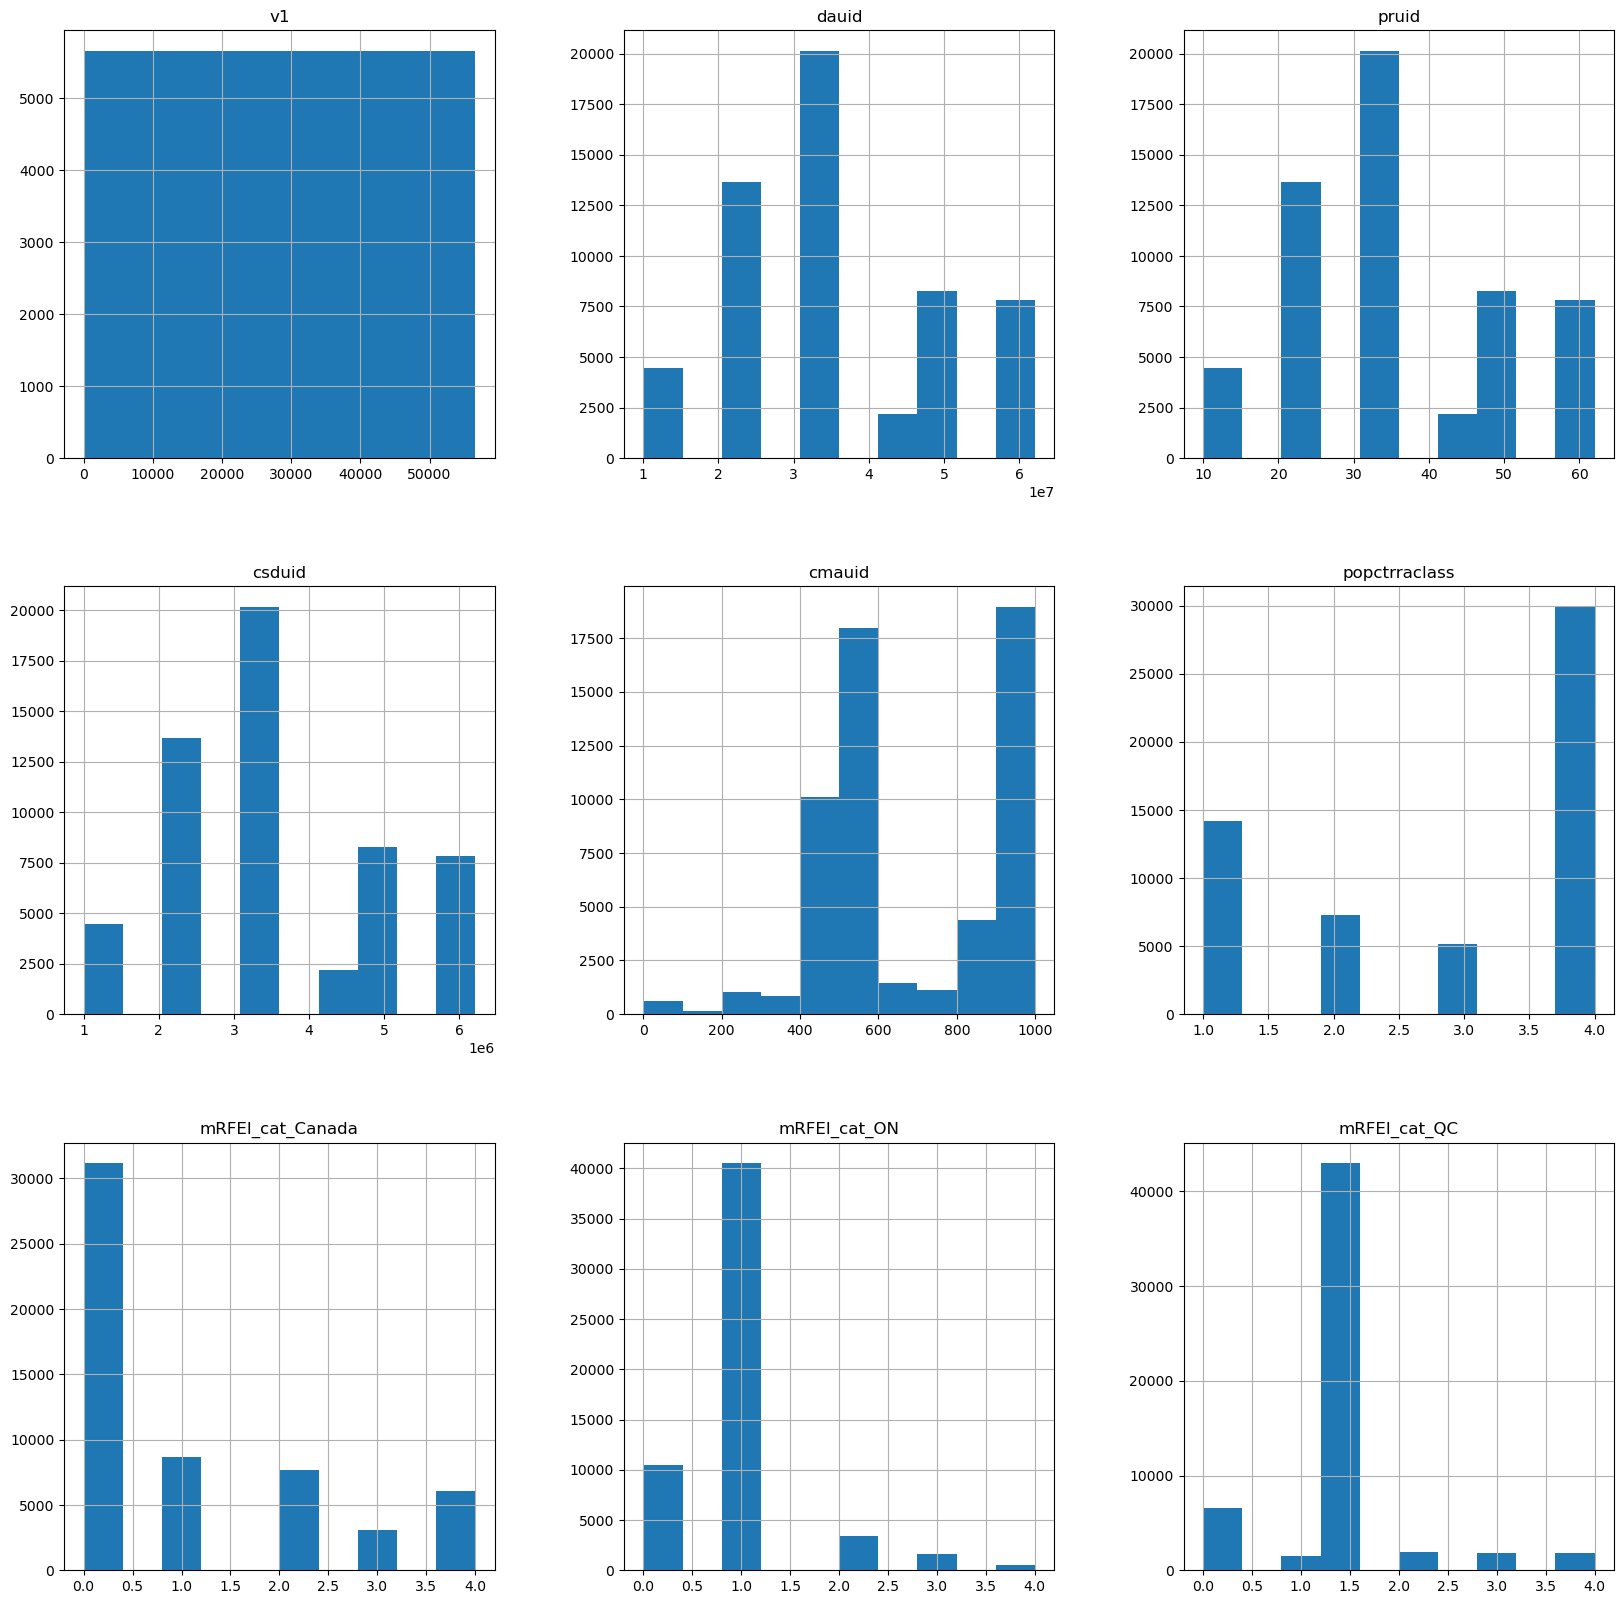

In [239]:
###Model Checking for the Correlation and Plotting through Histogram for Distribution

###Initial Histogram for Visuaization and Distribution Comments

dfIsorted.hist(bins=10)
plt.rcParams["figure.figsize"] = (20,20)

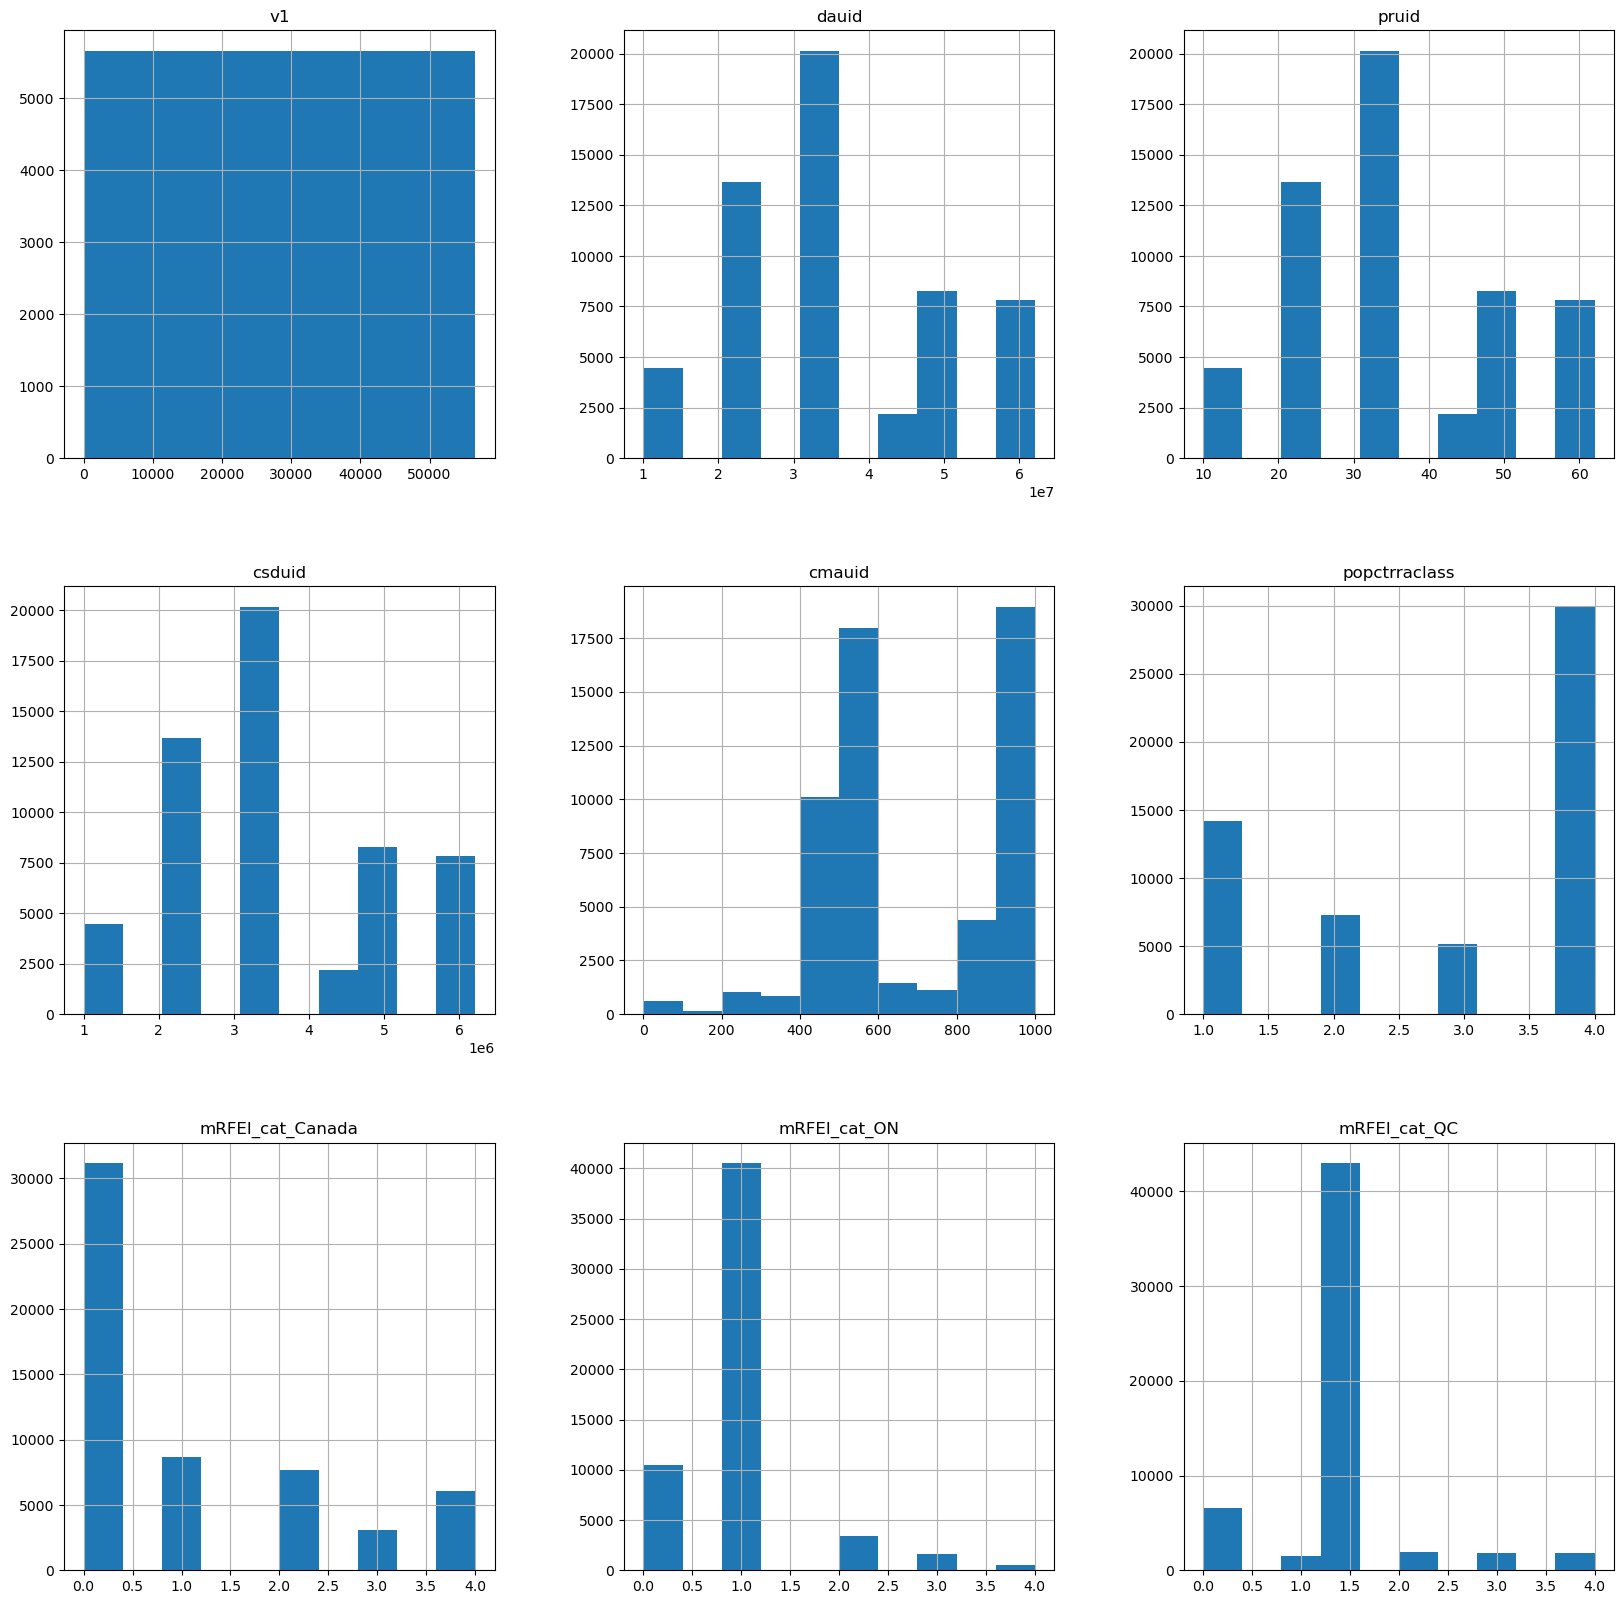

In [241]:
###Model Checking for the Correlation and Plotting through Histogram for Distribution

###Initial Histogram for Visuaization and Distribution Comments

dfIIsorted.hist(bins=10)
plt.rcParams["figure.figsize"] = (20,20)

<Axes: >

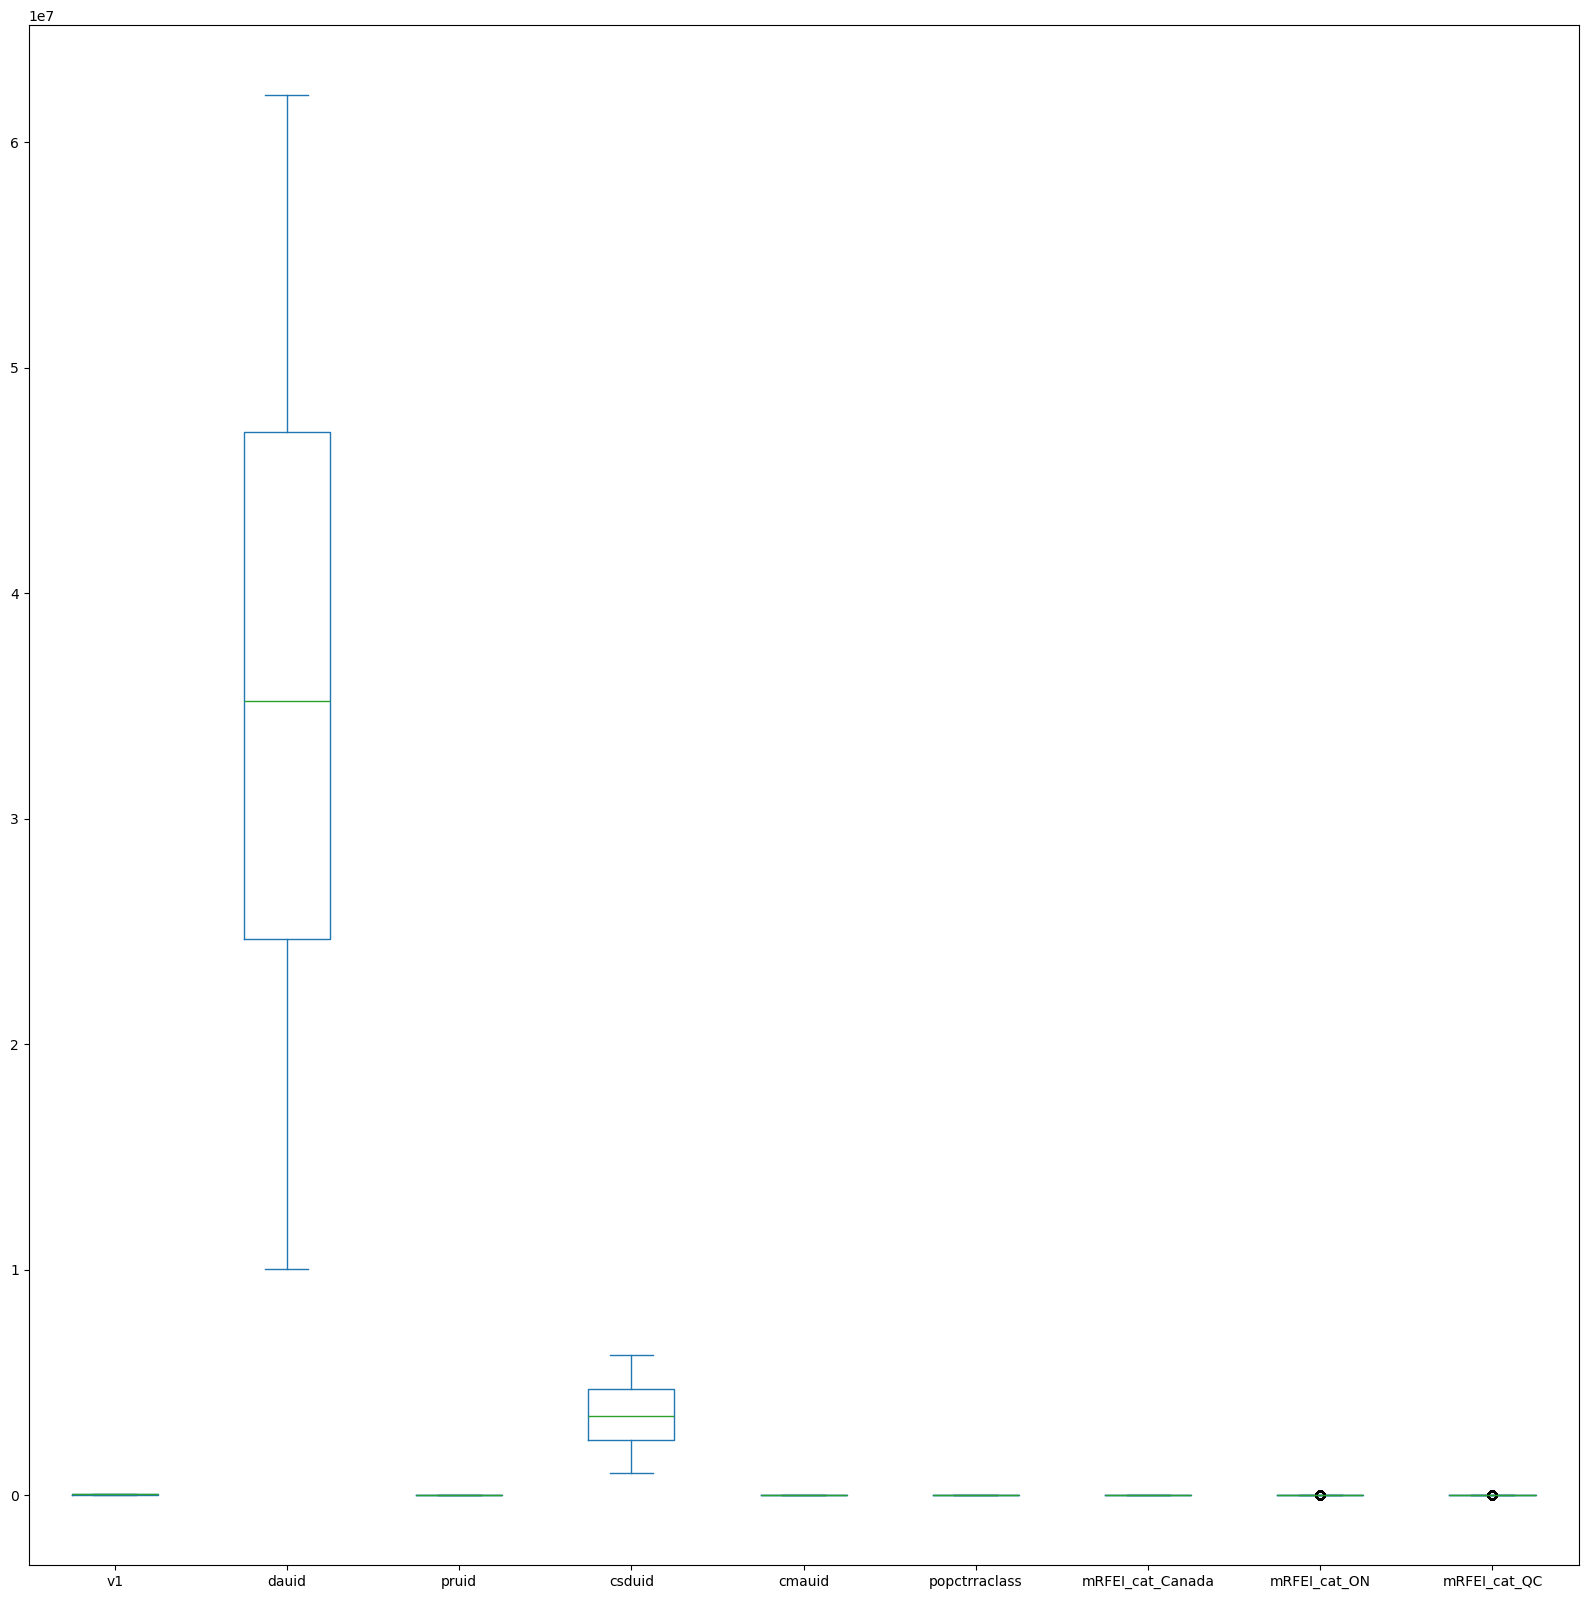

In [242]:
#Box Plot Box and Whisker's Data Frame's Segmentation to check Minimum, Maximum Values, Mean, 25% or 1st Quartile / Segment and 3rd Quartile or Segment also known as the 75% of a data selection or dataframe.

dfIsorted.plot.box()

<Axes: >

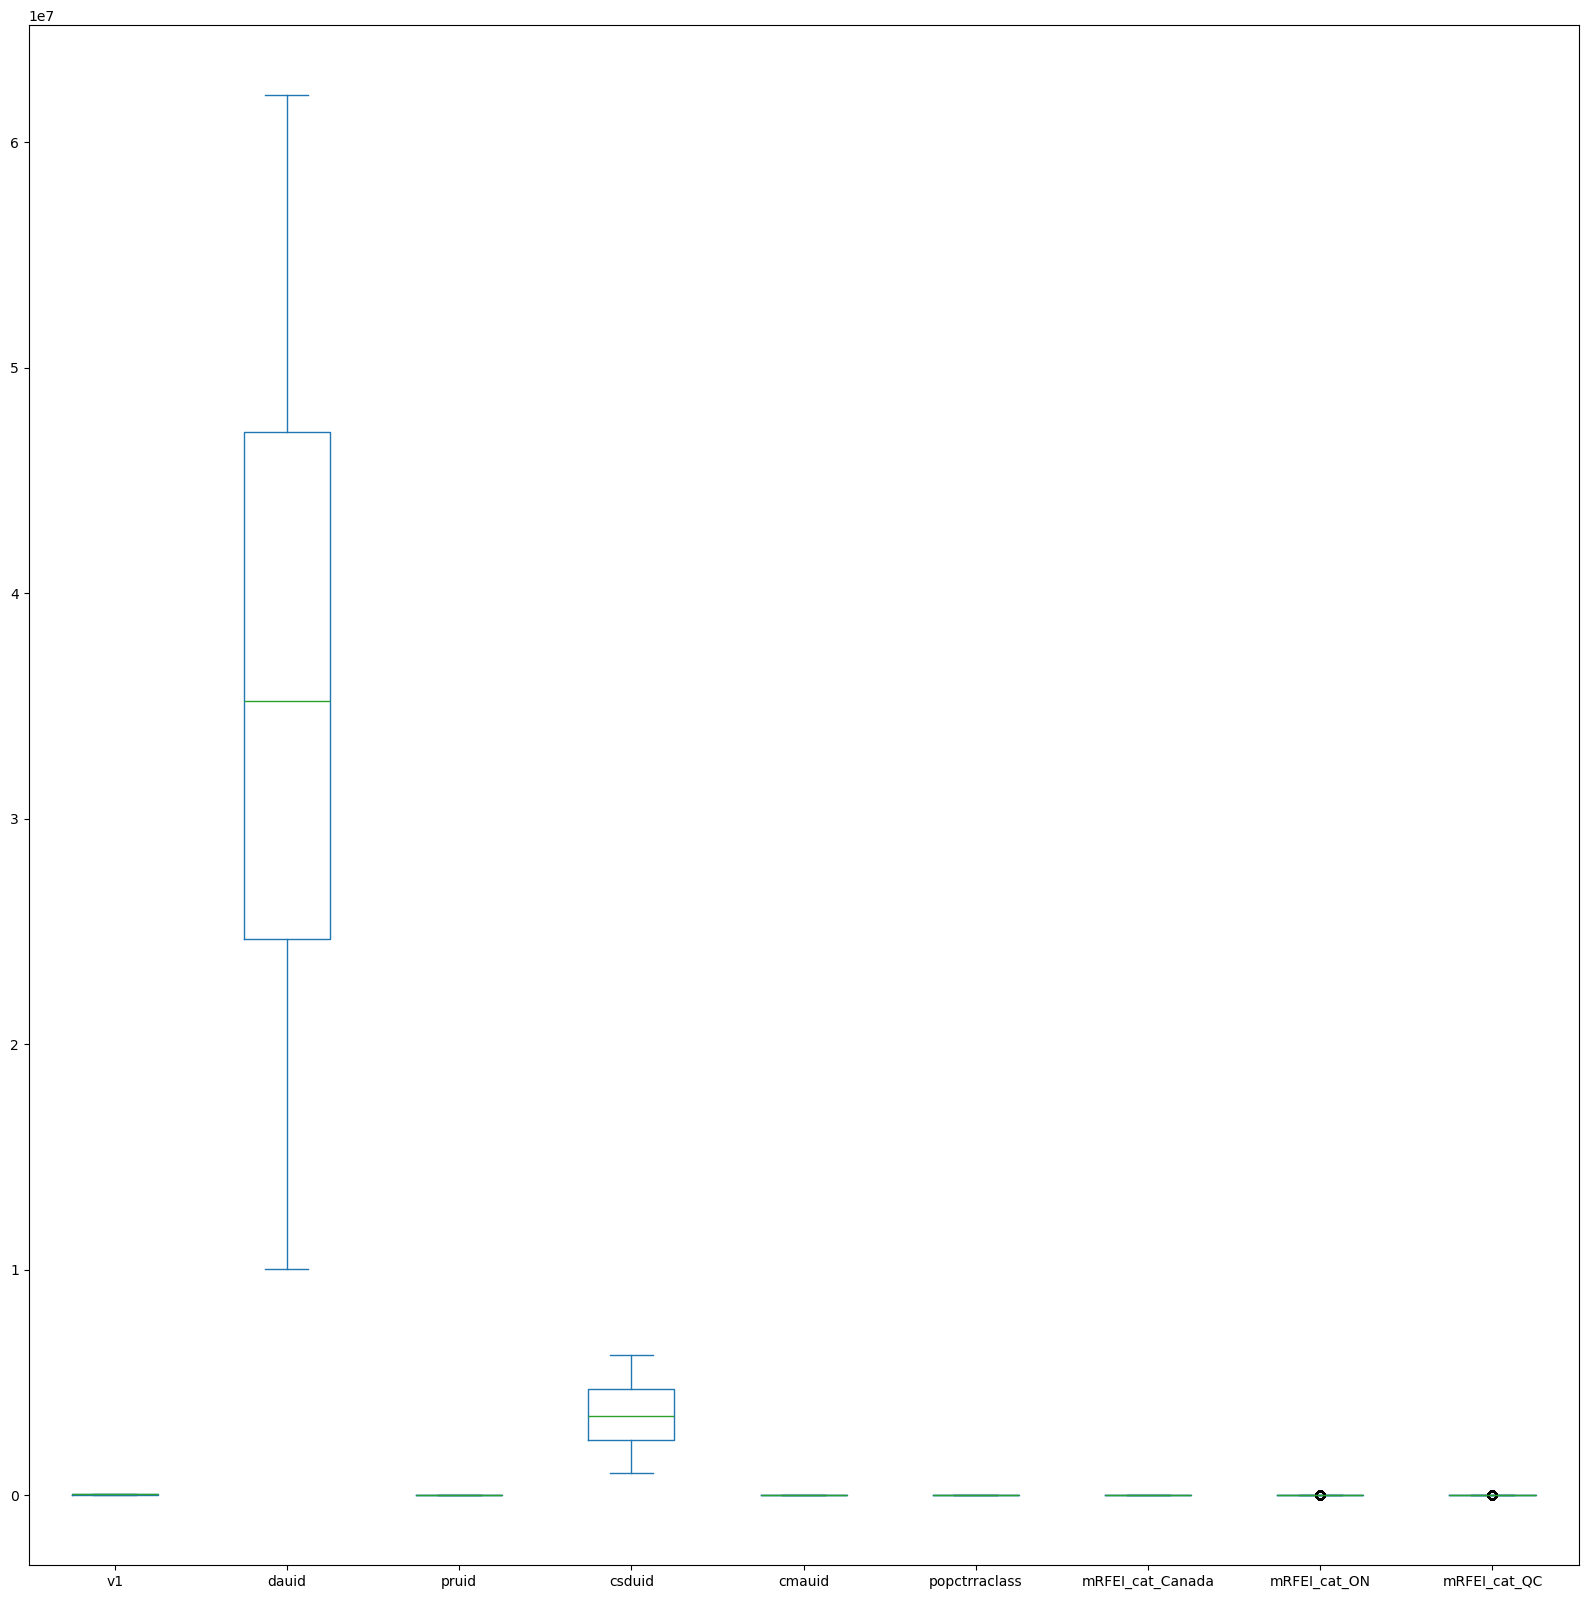

In [245]:
#Box Plot Box and Whisker's Data Frame's Segmentation to check Minimum, Maximum Values, Mean, 25% or 1st Quartile / Segment and 3rd Quartile or Segment also known as the 75% of a data selection or dataframe.

dfIIsorted.plot.box()

<Axes: ylabel='Density'>

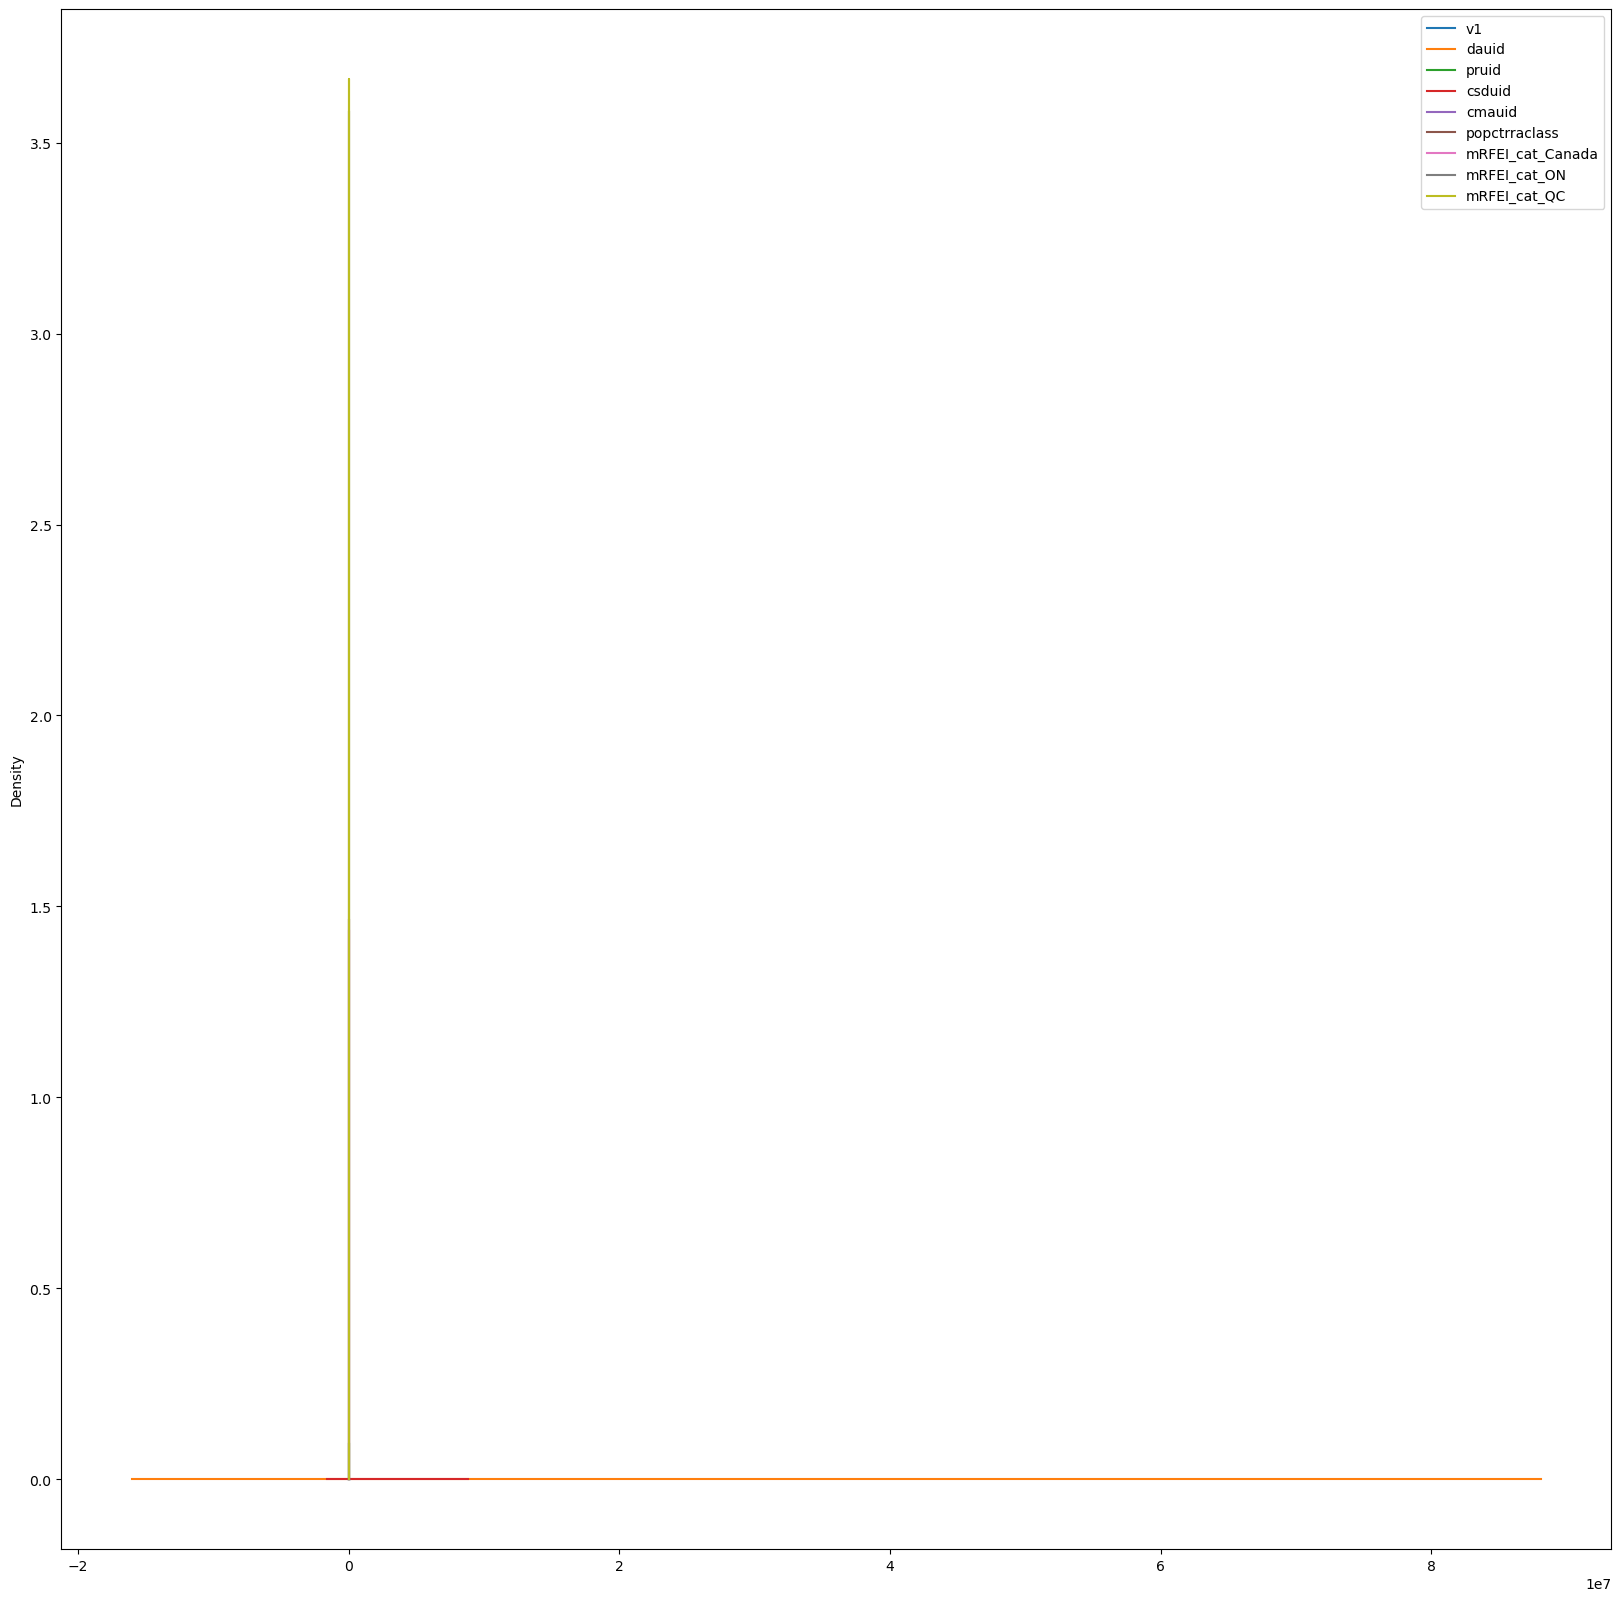

In [247]:
###KDE Plotting to determine the Distribution of the sorted_dataframe for the restaurants.

dfIsorted.plot(kind='kde')

###Games Won and Games Lost conducted a higher crest and wave length for the Datasets Distribution in a Regular manner as let us remeber in order to Normalize data it must have an equal to Values with the middle in 0 and Values equaling to 1 a -1.

<Axes: ylabel='Density'>

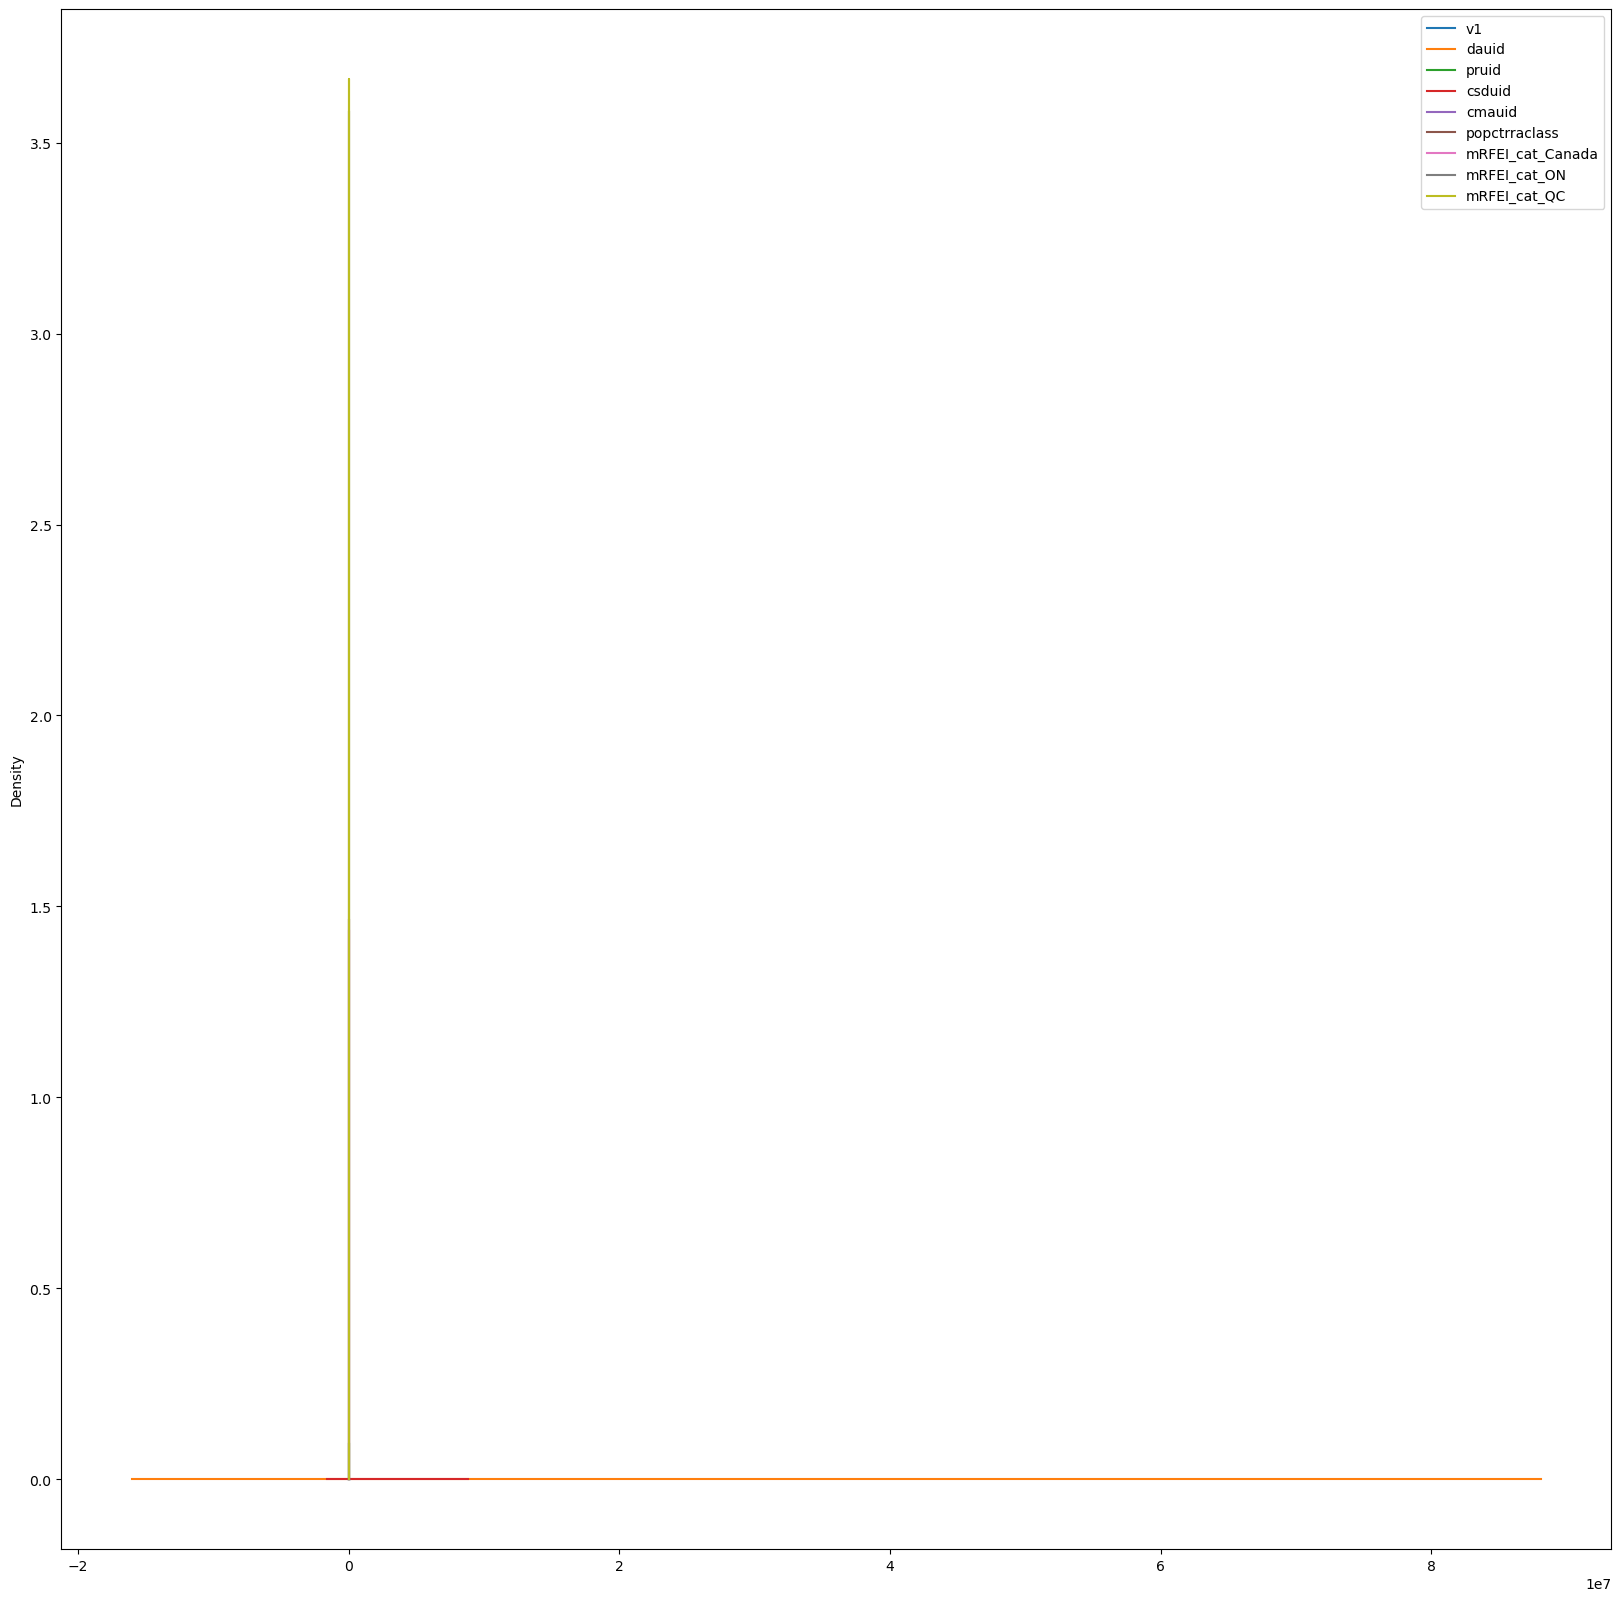

In [251]:
###KDE Plotting to determine the Distribution of the sorted_dataframe for the restaurants.

dfIIsorted.plot(kind='kde')

###Games Won and Games Lost conducted a higher crest and wave length for the Datasets Distribution in a Regular manner as let us remeber in order to Normalize data it must have an equal to Values with the middle in 0 and Values equaling to 1 a -1.

In [259]:
###For the DI and DII sortings it is present a higher frecuency in Density for values in mREFEI_cat_QC (M. Referal for Catering in Quebec City (QC) and for the II dataframe we find inside of the dauid.

dfIsorted.columns

Index(['v1', 'dauid', 'pruid', 'csduid', 'cmauid', 'popctrraclass',
       'mRFEI_cat_Canada', 'mRFEI_cat_ON', 'mRFEI_cat_QC'],
      dtype='object')

In [261]:
dfIIsorted.columns

Index(['v1', 'dauid', 'pruid', 'csduid', 'cmauid', 'popctrraclass',
       'mRFEI_cat_Canada', 'mRFEI_cat_ON', 'mRFEI_cat_QC'],
      dtype='object')

In [263]:
print(dfIsorted.dtypes)


v1                    int64
dauid                 int64
pruid                 int64
csduid                int64
cmauid                int64
popctrraclass         int64
mRFEI_cat_Canada    float64
mRFEI_cat_ON        float64
mRFEI_cat_QC        float64
dtype: object


In [265]:
print(dfIIsorted.dtypes)


v1                    int64
dauid                 int64
pruid                 int64
csduid                int64
cmauid                int64
popctrraclass         int64
mRFEI_cat_Canada    float64
mRFEI_cat_ON        float64
mRFEI_cat_QC        float64
dtype: object


array([[<Axes: xlabel='v1', ylabel='v1'>,
        <Axes: xlabel='dauid', ylabel='v1'>,
        <Axes: xlabel='pruid', ylabel='v1'>,
        <Axes: xlabel='csduid', ylabel='v1'>,
        <Axes: xlabel='cmauid', ylabel='v1'>,
        <Axes: xlabel='popctrraclass', ylabel='v1'>,
        <Axes: xlabel='mRFEI_cat_Canada', ylabel='v1'>,
        <Axes: xlabel='mRFEI_cat_ON', ylabel='v1'>,
        <Axes: xlabel='mRFEI_cat_QC', ylabel='v1'>],
       [<Axes: xlabel='v1', ylabel='dauid'>,
        <Axes: xlabel='dauid', ylabel='dauid'>,
        <Axes: xlabel='pruid', ylabel='dauid'>,
        <Axes: xlabel='csduid', ylabel='dauid'>,
        <Axes: xlabel='cmauid', ylabel='dauid'>,
        <Axes: xlabel='popctrraclass', ylabel='dauid'>,
        <Axes: xlabel='mRFEI_cat_Canada', ylabel='dauid'>,
        <Axes: xlabel='mRFEI_cat_ON', ylabel='dauid'>,
        <Axes: xlabel='mRFEI_cat_QC', ylabel='dauid'>],
       [<Axes: xlabel='v1', ylabel='pruid'>,
        <Axes: xlabel='dauid', ylabel='pruid'>,
    

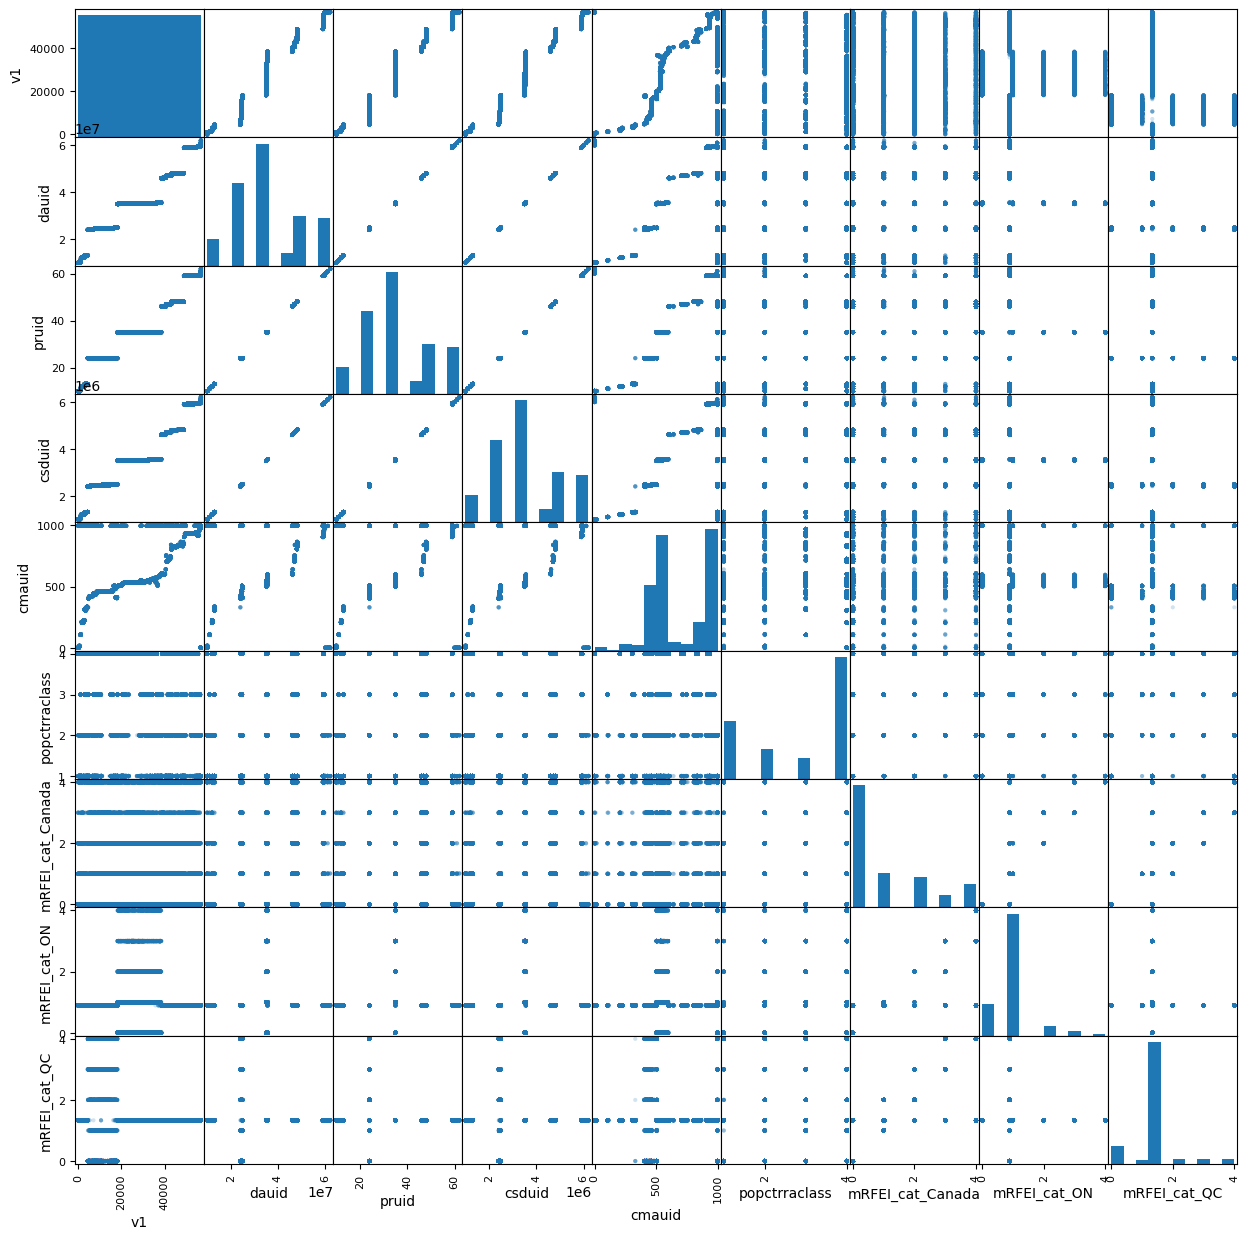

In [267]:
scatter_matrix(dfIsorted, alpha=0.2, figsize=(15, 15), diagonal='hist')

array([[<Axes: xlabel='v1', ylabel='v1'>,
        <Axes: xlabel='dauid', ylabel='v1'>,
        <Axes: xlabel='pruid', ylabel='v1'>,
        <Axes: xlabel='csduid', ylabel='v1'>,
        <Axes: xlabel='cmauid', ylabel='v1'>,
        <Axes: xlabel='popctrraclass', ylabel='v1'>,
        <Axes: xlabel='mRFEI_cat_Canada', ylabel='v1'>,
        <Axes: xlabel='mRFEI_cat_ON', ylabel='v1'>,
        <Axes: xlabel='mRFEI_cat_QC', ylabel='v1'>],
       [<Axes: xlabel='v1', ylabel='dauid'>,
        <Axes: xlabel='dauid', ylabel='dauid'>,
        <Axes: xlabel='pruid', ylabel='dauid'>,
        <Axes: xlabel='csduid', ylabel='dauid'>,
        <Axes: xlabel='cmauid', ylabel='dauid'>,
        <Axes: xlabel='popctrraclass', ylabel='dauid'>,
        <Axes: xlabel='mRFEI_cat_Canada', ylabel='dauid'>,
        <Axes: xlabel='mRFEI_cat_ON', ylabel='dauid'>,
        <Axes: xlabel='mRFEI_cat_QC', ylabel='dauid'>],
       [<Axes: xlabel='v1', ylabel='pruid'>,
        <Axes: xlabel='dauid', ylabel='pruid'>,
    

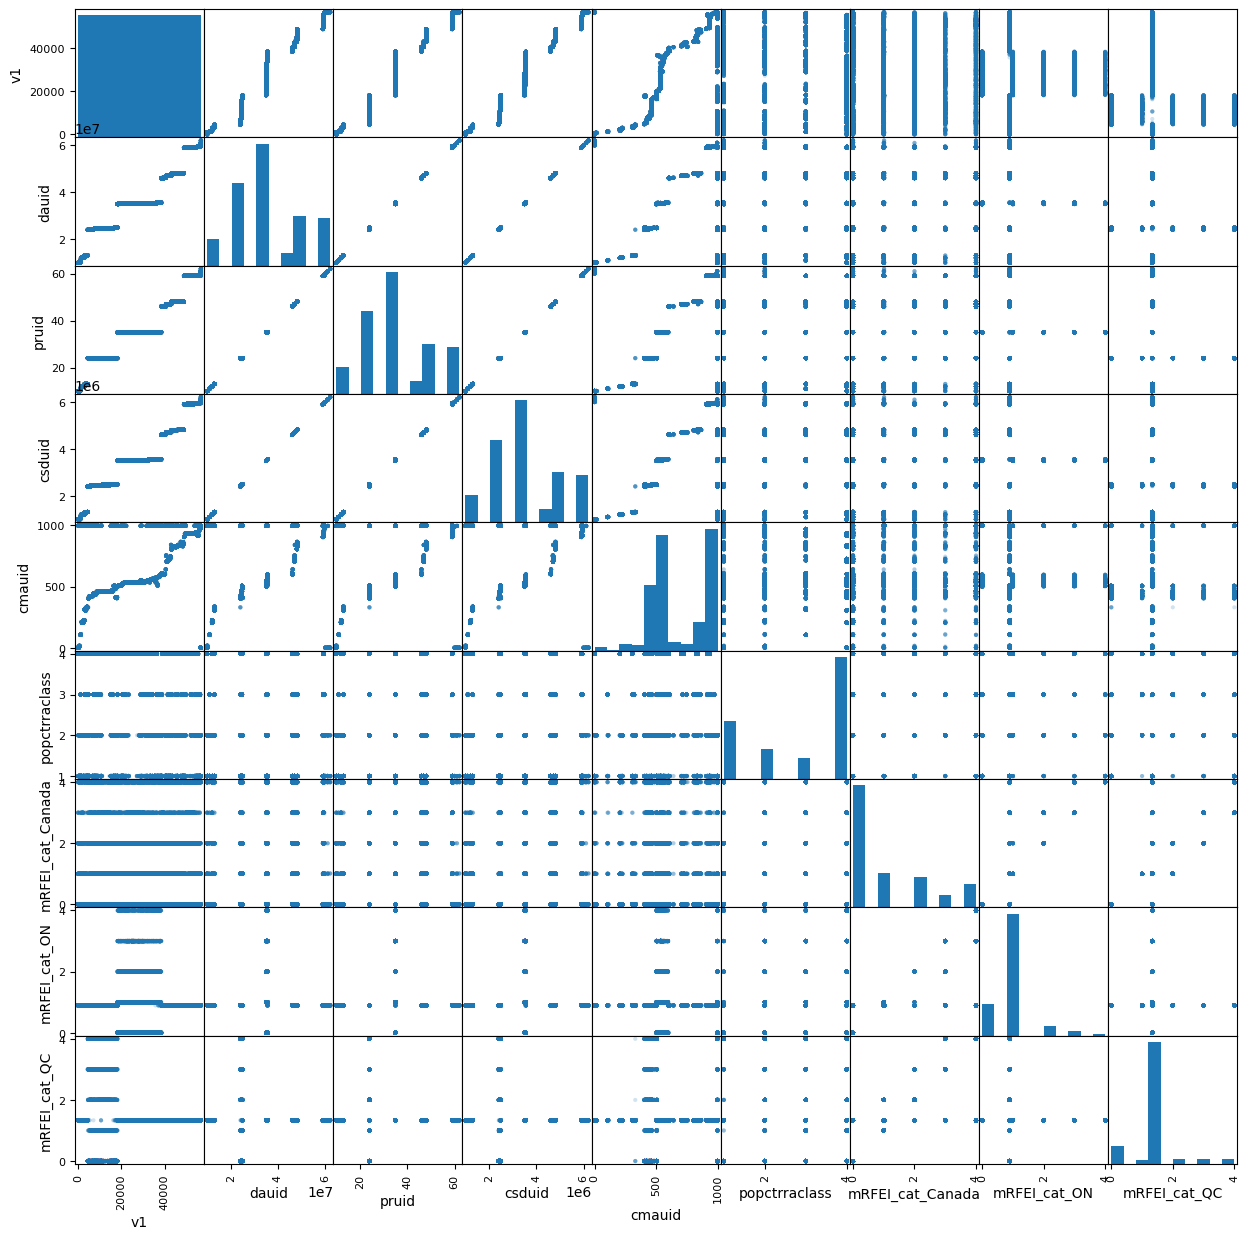

In [268]:
scatter_matrix(dfIIsorted, alpha=0.2, figsize=(15, 15), diagonal='hist')

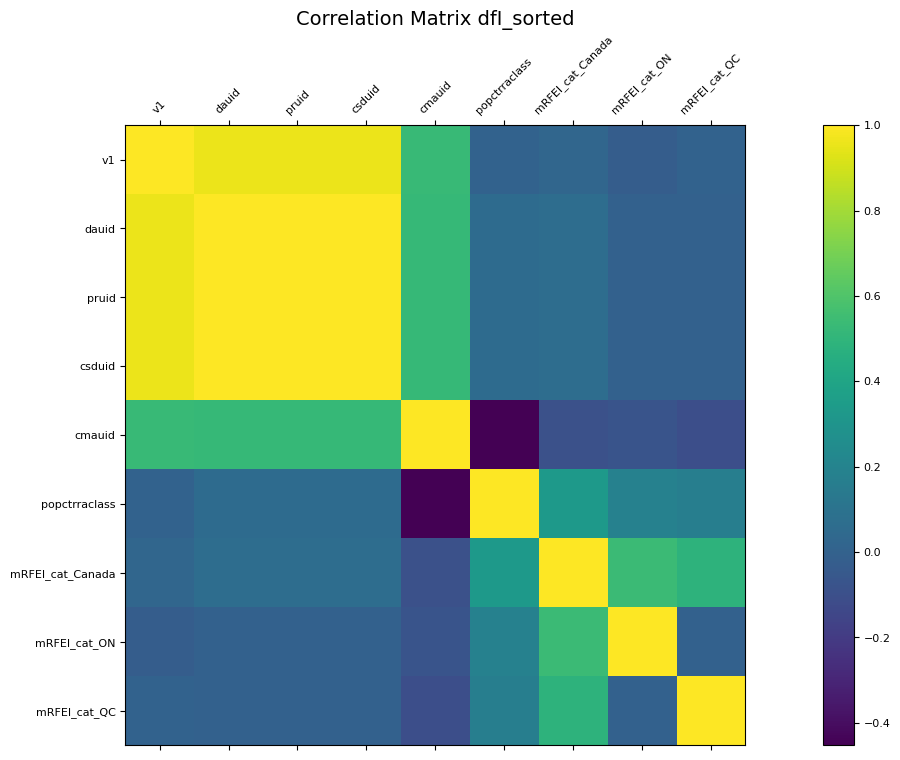

In [270]:
###Correlation Matrix Check-Up for dfIsorted

figure = plt.figure(figsize=(20, 8))
plt.matshow(dfIsorted.corr(numeric_only='true'), fignum=figure.number)
plt.xticks(range(dfIsorted.select_dtypes(['number']).shape[1]), dfIsorted.select_dtypes(['number']).columns, fontsize=8, rotation=45)
plt.yticks(range(dfIsorted.select_dtypes(['number']).shape[1]), dfIsorted.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8) 
plt.title('Correlation Matrix dfI_sorted', fontsize=14);

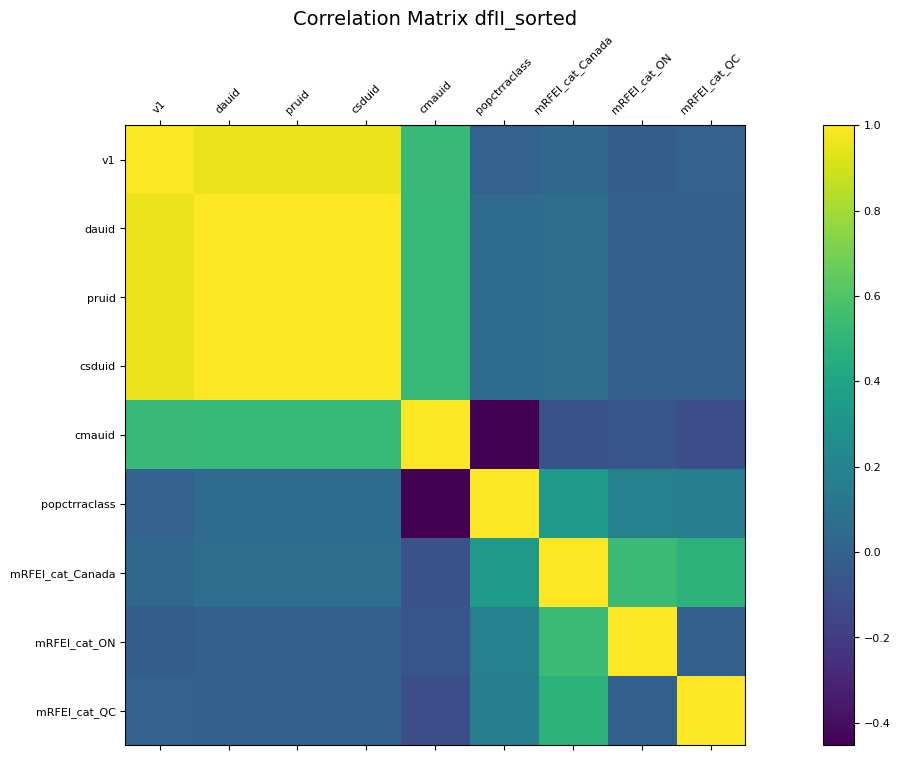

In [271]:
###Correlation Matrix Check-Up for dfIIsorted

figure = plt.figure(figsize=(20, 8))
plt.matshow(dfIIsorted.corr(numeric_only='true'), fignum=figure.number)
plt.xticks(range(dfIIsorted.select_dtypes(['number']).shape[1]), dfIIsorted.select_dtypes(['number']).columns, fontsize=8, rotation=45)
plt.yticks(range(dfIIsorted.select_dtypes(['number']).shape[1]), dfIIsorted.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8) 
plt.title('Correlation Matrix dfII_sorted', fontsize=14);

In [272]:
###dfIsorted.shape

dfIsorted.shape

(56590, 9)

In [273]:
###dfIIsorted.shape

dfIIsorted.shape

(56590, 9)

In [274]:
###Correlation

# get the absolute correlations for the target variable
correlations_target = abs(dfIsorted.corr()['v1'])

# filter out those that are below our threshold
correlated_features = correlations_target[correlations_target >= 0.6]

# drop the target variable's column
correlated_features.drop('v1', inplace=True)

# get the column names for later use
correlated_feature_variable_names = correlated_features.index

In [275]:
# the collection of feature variable names we'll drop due to their being correlated to other features
correlated_feature_variable_names_to_drop = []

# loop over the feature combinations
for name_1 in correlated_feature_variable_names:
    for name_2 in correlated_feature_variable_names:
        # only look at correlations between separate feature variables
        if name_1 != name_2:
            # drop one of the feature variables if there's a strong correlation
            if abs(dfIsorted[[name_1, name_2]].corr()[name_1][name_2]) > 0.6:
                # only worry about it if neither of the variables have been added to the drop list
                if (name_1 not in correlated_feature_variable_names_to_drop) and \
                        (name_2 not in correlated_feature_variable_names_to_drop):
                    # drop the one which has the least correlation to the target variable
                    if correlated_features[name_1] >= correlated_features[name_2]:
                        correlated_feature_variable_names_to_drop.append(name_2)
                    else:
                        correlated_feature_variable_names_to_drop.append(name_1)

# drop the variables we've found that qualify
correlated_features.drop(correlated_feature_variable_names_to_drop, inplace=True)

# get the remaining variables' column names for later use
filtered_feature_variable_names = correlated_features.index

In [276]:
# fit a simple ordinary least squares model to the features
X = dfIsorted[filtered_feature_variable_names]
y = dfIsorted["v1"]
estimate = sm.OLS(y, np.asarray(X)).fit()

# display the regression results
estimate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     v1   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          1.242e+06
Date:                Tue, 08 Apr 2025   Prob (F-statistic):                        0.00
Time:                        16:08:42   Log-Likelihood:                     -5.7985e+05
No. Observations:               56590   AIC:                                  1.160e+06
Df Residuals:                   56589   BIC:                                  1.160e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0082    7.4e-06   1114.559      0.000       0.008       0.008
==============================================================================
Omnibus:                    48957.265   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3719.021
Skew:                          -0.190   Prob(JB):                         0.00
Kurtosis:                       1.803   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
# fit a simple ordinary least squares model to the features
X = dfIIsorted[filtered_feature_variable_names]
y = dfIIsorted["v1"]
estimate = sm.OLS(y, np.asarray(X)).fit()

# display the regression results
estimate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     v1   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          1.242e+06
Date:                Tue, 08 Apr 2025   Prob (F-statistic):                        0.00
Time:                        16:11:29   Log-Likelihood:                     -5.7985e+05
No. Observations:               56590   AIC:                                  1.160e+06
Df Residuals:                   56589   BIC:                                  1.160e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0082    7.4e-06   1114.559      0.000       0.008       0.008
==============================================================================
Omnibus:                    48957.265   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3719.021
Skew:                          -0.190   Prob(JB):                         0.00
Kurtosis:                       1.803   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
###Correlation

# get the absolute correlations for the target variable
correlations_target = abs(dfIIsorted.corr()['v1'])

# filter out those that are below our threshold
correlated_features = correlations_target[correlations_target >= 0.6]

# drop the target variable's column
correlated_features.drop('v1', inplace=True)

# get the column names for later use
correlated_feature_variable_names = correlated_features.index

In [290]:
# the collection of feature variable names we'll drop due to their being correlated to other features
correlated_feature_variable_names_to_drop = []

# loop over the feature combinations
for name_1 in correlated_feature_variable_names:
    for name_2 in correlated_feature_variable_names:
        # only look at correlations between separate feature variables
        if name_1 != name_2:
            # drop one of the feature variables if there's a strong correlation
            if abs(dfIIsorted[[name_1, name_2]].corr()[name_1][name_2]) > 0.6:
                # only worry about it if neither of the variables have been added to the drop list
                if (name_1 not in correlated_feature_variable_names_to_drop) and \
                        (name_2 not in correlated_feature_variable_names_to_drop):
                    # drop the one which has the least correlation to the target variable
                    if correlated_features[name_1] >= correlated_features[name_2]:
                        correlated_feature_variable_names_to_drop.append(name_2)
                    else:
                        correlated_feature_variable_names_to_drop.append(name_1)

# drop the variables we've found that qualify
correlated_features.drop(correlated_feature_variable_names_to_drop, inplace=True)

# get the remaining variables' column names for later use
filtered_feature_variable_names = correlated_features.index

In [292]:
# fit a simple ordinary least squares model to the features
X = dfIIsorted[filtered_feature_variable_names]
y = dfIIsorted["v1"]
estimate = sm.OLS(y, np.asarray(X)).fit()

# display the regression results
estimate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     v1   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          1.242e+06
Date:                Tue, 08 Apr 2025   Prob (F-statistic):                        0.00
Time:                        16:11:40   Log-Likelihood:                     -5.7985e+05
No. Observations:               56590   AIC:                                  1.160e+06
Df Residuals:                   56589   BIC:                                  1.160e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0082    7.4e-06   1114.559      0.000       0.008       0.008
==============================================================================
Omnibus:                    48957.265   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3719.021
Skew:                          -0.190   Prob(JB):                         0.00
Kurtosis:                       1.803   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [294]:
import numpy as np
import statsmodels.api as sm

# Step 1: Compute absolute correlations with the target variable 'v1'
correlations_target = abs(dfIsorted.corr()['v1'])

# Step 2: Filter features with correlation >= 0.6 (excluding 'v1' itself)
correlated_features = correlations_target[correlations_target >= 0.6].drop('v1')

# Step 3: Get the names of these features
correlated_feature_variable_names = correlated_features.index.tolist()

# Step 4: Initialize list to store names of variables to drop
correlated_feature_variable_names_to_drop = []

# Step 5: Check for high correlations between selected features
for name_1 in correlated_feature_variable_names:
    for name_2 in correlated_feature_variable_names:
        if name_1 != name_2:
            # Check correlation between the two features
            corr = abs(dfIsorted[[name_1, name_2]].corr().iloc[0, 1])
            if corr > 0.6:
                if (name_1 not in correlated_feature_variable_names_to_drop and 
                    name_2 not in correlated_feature_variable_names_to_drop):
                    # Drop the one with the lower correlation to the target
                    if correlated_features[name_1] >= correlated_features[name_2]:
                        correlated_feature_variable_names_to_drop.append(name_2)
                    else:
                        correlated_feature_variable_names_to_drop.append(name_1)

# Step 6: Drop correlated variables
for name in correlated_feature_variable_names_to_drop:
    correlated_features.drop(name, inplace=True, errors='ignore')  # safer drop

# Step 7: Get remaining filtered feature names
filtered_feature_variable_names = correlated_features.index.tolist()

# Step 8: Fit a linear regression model using the filtered features
X = dfIsorted[filtered_feature_variable_names]
y = dfIsorted['v1']
estimate = sm.OLS(y, sm.add_constant(np.asarray(X))).fit()  # Added constant for intercept

# Step 9: Display regression results
print(estimate.summary())


                            OLS Regression Results                            
Dep. Variable:                     v1   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 6.439e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:11:43   Log-Likelihood:            -5.5810e+05
No. Observations:               56590   AIC:                         1.116e+06
Df Residuals:                   56588   BIC:                         1.116e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.455e+04     56.848   -255.920      0.0

In [296]:
import numpy as np
import statsmodels.api as sm

# Step 1: Compute absolute correlations with the target variable 'v1'
correlations_target = abs(dfIIsorted.corr()['v1'])

# Step 2: Filter features with correlation >= 0.6 (excluding 'v1' itself)
correlated_features = correlations_target[correlations_target >= 0.6].drop('v1')

# Step 3: Get the names of these features
correlated_feature_variable_names = correlated_features.index.tolist()

# Step 4: Initialize list to store names of variables to drop
correlated_feature_variable_names_to_drop = []

# Step 5: Check for high correlations between selected features
for name_1 in correlated_feature_variable_names:
    for name_2 in correlated_feature_variable_names:
        if name_1 != name_2:
            # Check correlation between the two features
            corr = abs(dfIIsorted[[name_1, name_2]].corr().iloc[0, 1])
            if corr > 0.6:
                if (name_1 not in correlated_feature_variable_names_to_drop and 
                    name_2 not in correlated_feature_variable_names_to_drop):
                    # Drop the one with the lower correlation to the target
                    if correlated_features[name_1] >= correlated_features[name_2]:
                        correlated_feature_variable_names_to_drop.append(name_2)
                    else:
                        correlated_feature_variable_names_to_drop.append(name_1)

# Step 6: Drop correlated variables
for name in correlated_feature_variable_names_to_drop:
    correlated_features.drop(name, inplace=True, errors='ignore')  # safer drop

# Step 7: Get remaining filtered feature names
filtered_feature_variable_names = correlated_features.index.tolist()

# Step 8: Fit a linear regression model using the filtered features
X = dfIIsorted[filtered_feature_variable_names]
y = dfIIsorted['v1']
estimate = sm.OLS(y, sm.add_constant(np.asarray(X))).fit()  # Added constant for intercept

# Step 9: Display regression results
print(estimate.summary())


                            OLS Regression Results                            
Dep. Variable:                     v1   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 6.439e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:11:46   Log-Likelihood:            -5.5810e+05
No. Observations:               56590   AIC:                         1.116e+06
Df Residuals:                   56588   BIC:                         1.116e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.455e+04     56.848   -255.920      0.0

In [298]:
from sklearn.model_selection import train_test_split

# Step 1: Define features and target
X = dfIsorted.drop('v1', axis=1)  # all columns except the target
y = dfIsorted['v1']               # target column

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [300]:
from sklearn.model_selection import train_test_split

# Step 1: Define features and target
X = dfIIsorted.drop('v1', axis=1)  # all columns except the target
y = dfIIsorted['v1']               # target column

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [302]:
###Random Forrest Regression

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

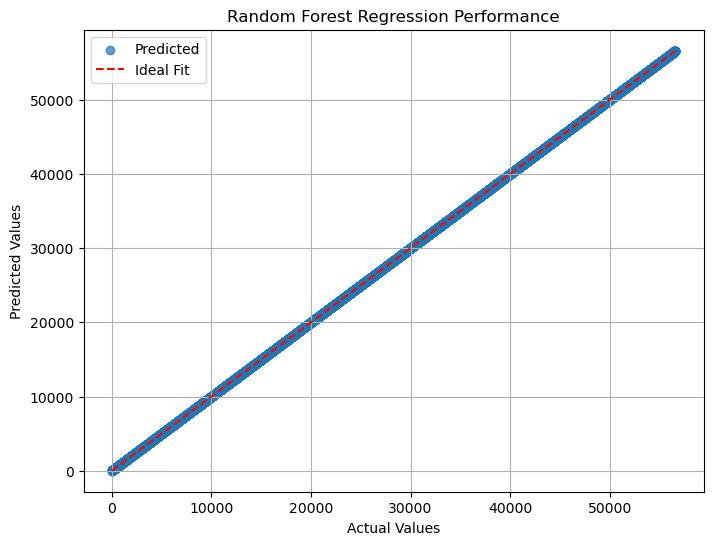

In [303]:
###Performance comparison

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions with your trained Random Forest model
rf_pred = rf.predict(X_test)

# Now plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression Performance")
plt.legend()
plt.grid(True)
plt.show()


In [304]:
# Calculate MSE and R^2
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R^2 Score: {rf_r2}")

Mean Squared Error (MSE): 2.6335203243595093
R^2 Score: 0.9999999901580514


In [305]:
# Imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)  # Replace with your data

# Get results
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   6.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   5.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   6.0s
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [306]:
# Train original model
original_model = RandomForestRegressor(n_estimators=100, random_state=42)
original_model.fit(X_train, y_train)

# Compare R^2 scores
print(f"Original Model R^2: {r2_score(y_test, original_model.predict(X_test))}")
print(f"Tuned Model R^2: {r2_score(y_test, best_model.predict(X_test))}")

Original Model R^2: 0.9999999901580514
Tuned Model R^2: 0.9999999901580514


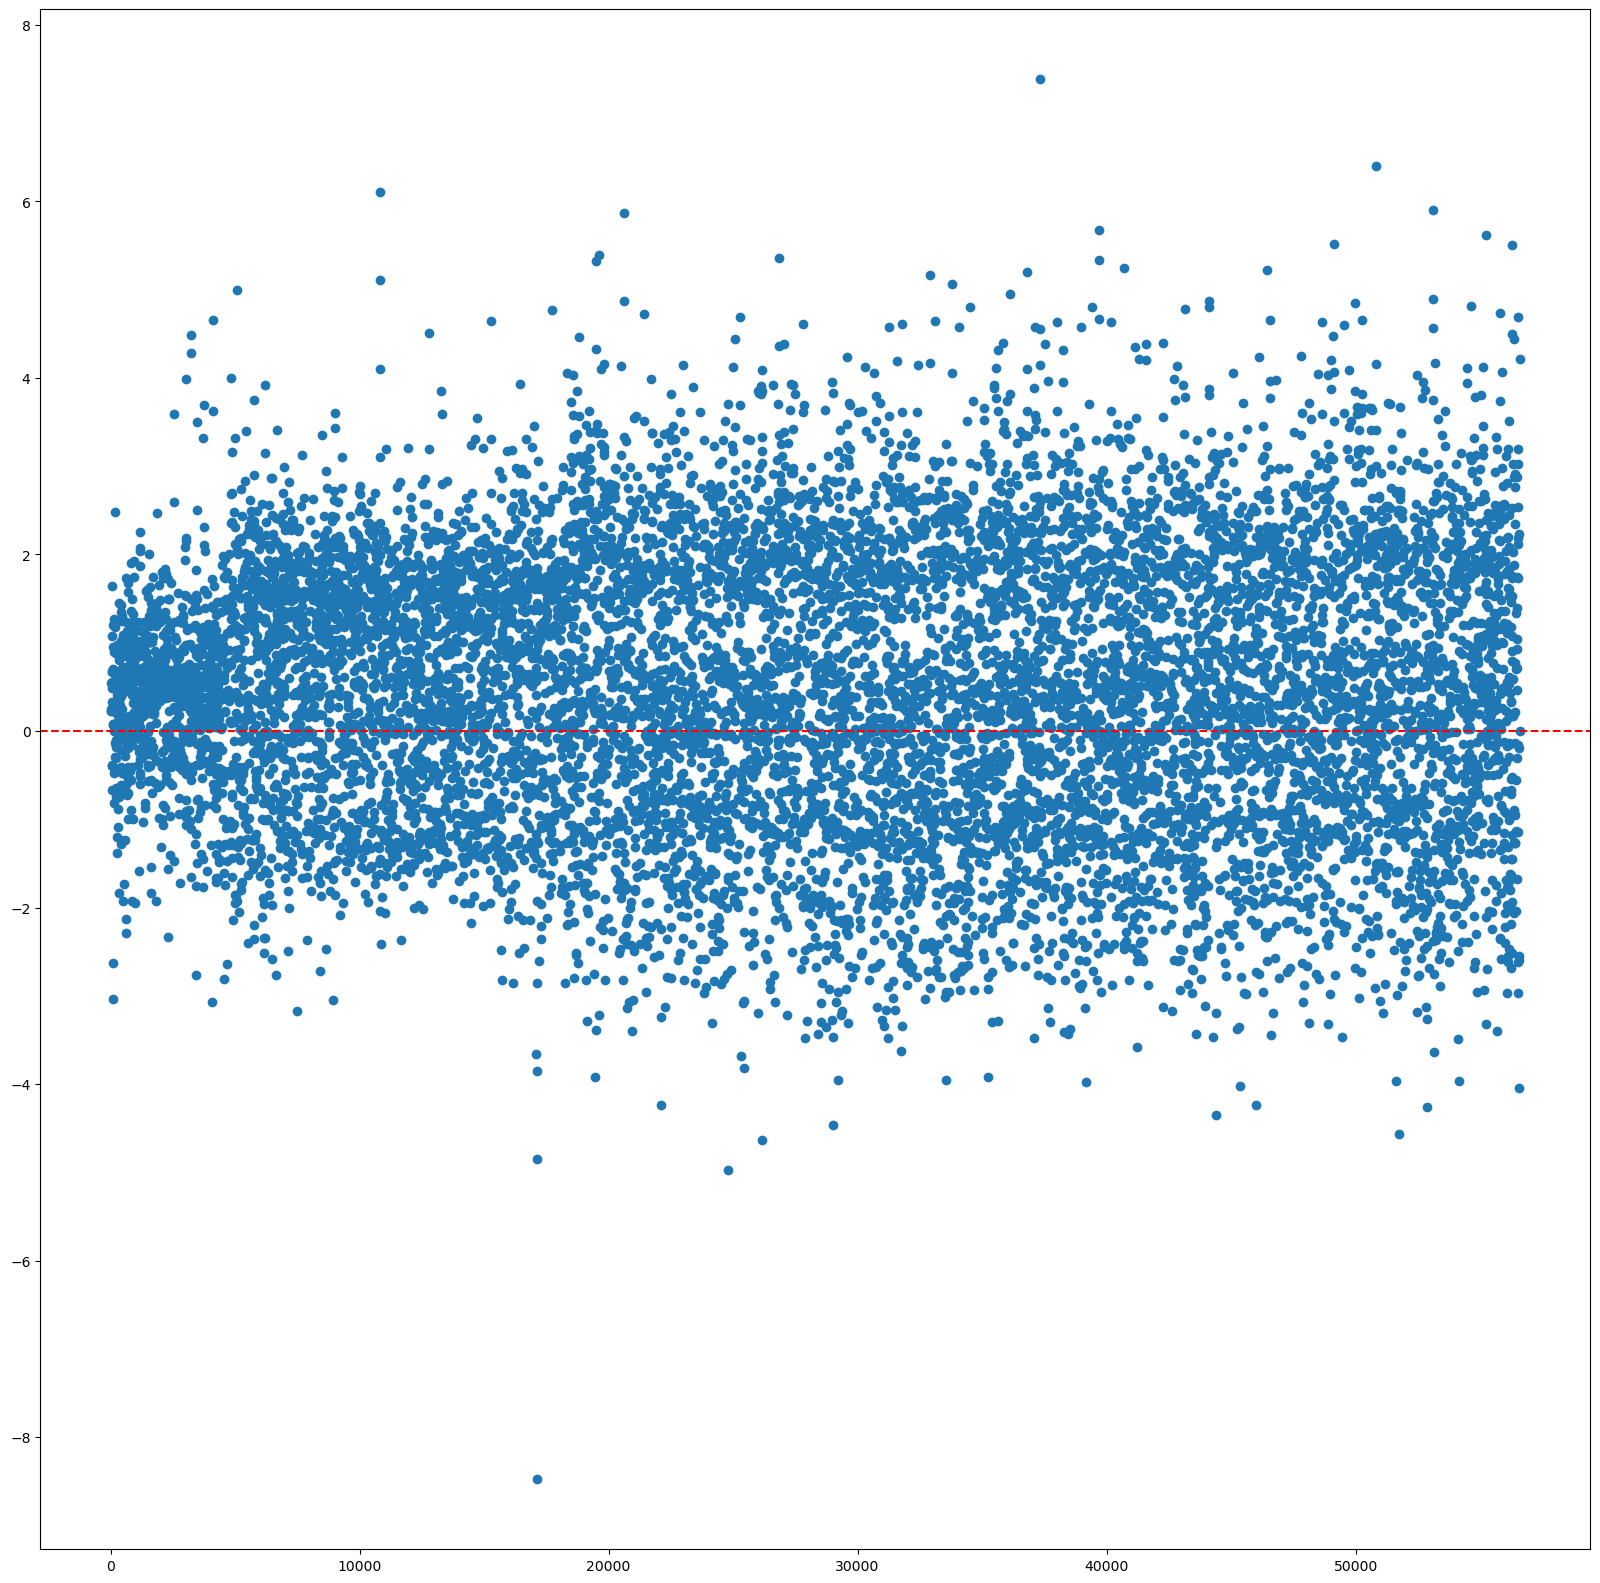

In [308]:
residuals = y_test - best_model.predict(X_test)
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')

In [309]:
###Second Handling of Numerical Values

# Fill missing values with the mean (numerical columns) or mode (categorical columns)
X_train.fillna(X_train.mean(), inplace=True)  # For numerical features
X_train.fillna(X_train.mode().iloc[0], inplace=True)  # For categorical features

X_test.fillna(X_train.mean(), inplace=True)  # Use training data stats for test set


In [310]:
###Scale Numerical Features (SNF)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [311]:
from pandas import get_dummies

X_train_encoded = pd.get_dummies(X_train, drop_first=True)  # Drop first category to avoid redundancy
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Ensure columns match between train and test sets
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

###One Hot Encoding of Non-Numerical's and NA's


In [312]:
# Create interaction terms between numerical features
X_train['new_feature'] = X_train['cmauid'] * X_train['dauid']
X_test['new_feature'] = X_test['cmauid'] * X_test['dauid']

In [315]:
# Train Random Forest to get feature importance scores
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_encoded, y_train)

# Get feature importance scores and select top features
import pandas as pd

importance = pd.Series(rf.feature_importances_, index=X_train_encoded.columns)
top_features = importance.nlargest(10).index  # Select top 10 features

# Reduce dataset to top features only
X_train_selected = X_train_encoded[top_features]
X_test_selected = X_test_encoded[top_features]


In [316]:
###OUTLIERS HANDLING

# Cap extreme values at the 99th percentile for a numerical column
cap_value = X_train['new_feature'].quantile(0.99)
X_train.loc[X_train['new_feature'] > cap_value, 'new_feature'] = cap_value

# Apply the same capping to the test set
X_test.loc[X_test['new_feature'] > cap_value, 'new_feature'] = cap_value

C:\Users\walter\AppData\Local\Temp\ipykernel_2256\2635974587.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '59250854535.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[X_train['new_feature'] > cap_value, 'new_feature'] = cap_value
C:\Users\walter\AppData\Local\Temp\ipykernel_2256\2635974587.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '59250854535.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[X_test['new_feature'] > cap_value, 'new_feature'] = cap_value


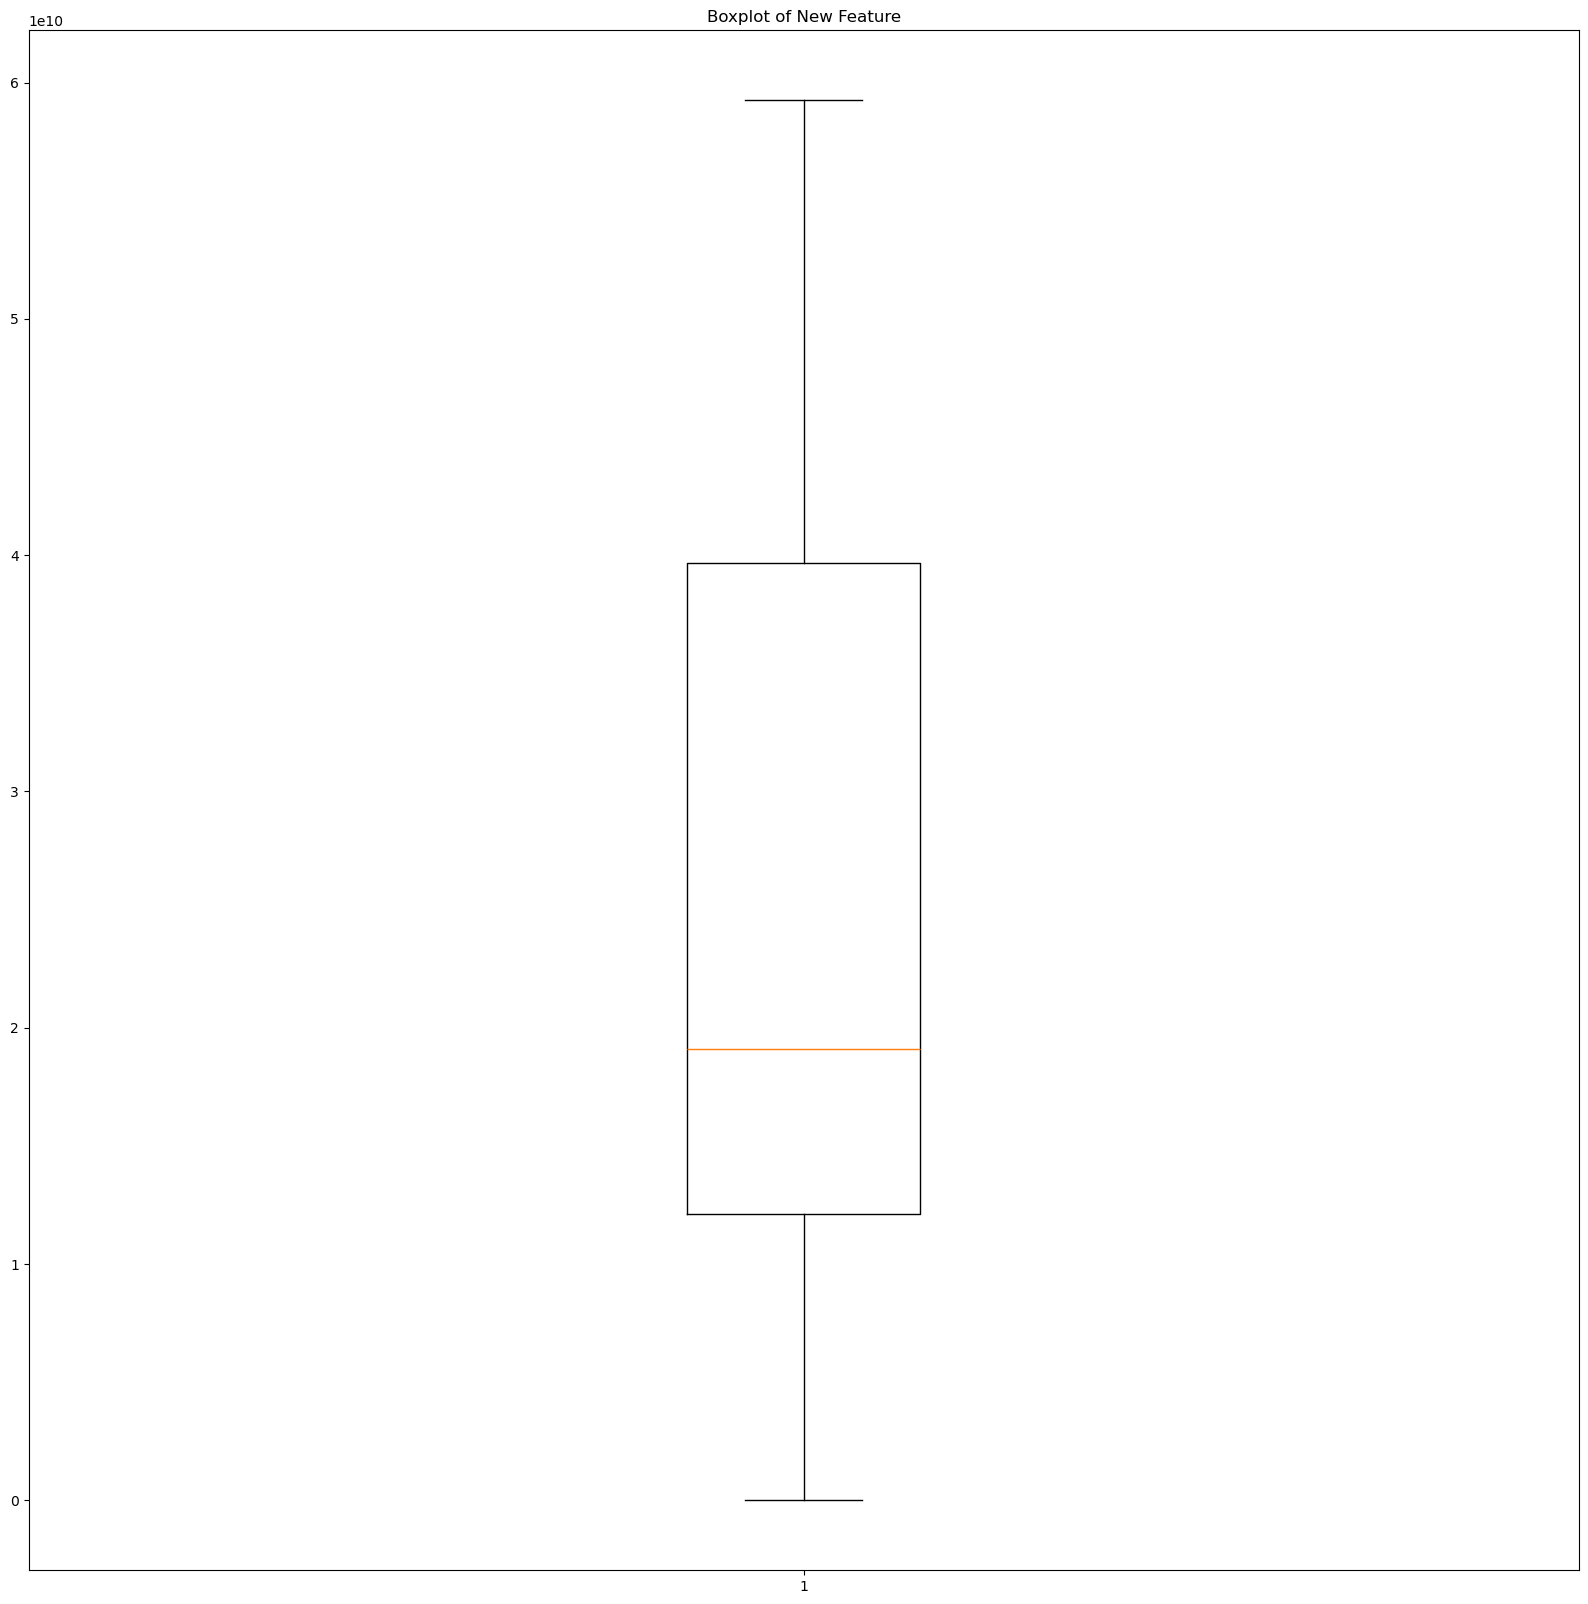

In [317]:
import matplotlib.pyplot as plt

plt.boxplot(X_train['new_feature'])
plt.title("Boxplot of New Feature")
plt.show()


In [318]:
###Z-Scores

from scipy.stats import zscore

# Compute Z-scores for training data
z_scores = zscore(X_train['new_feature'])

# Cap values based on Z-score threshold (e.g., |z| > 3)
threshold = 3
X_train.loc[z_scores > threshold, 'new_feature'] = X_train['new_feature'].mean()

# Apply same logic to test data
z_scores_test = (X_test['new_feature'] - X_train['new_feature'].mean()) / X_train['new_feature'].std()
X_test.loc[z_scores_test > threshold, 'new_feature'] = X_train['new_feature'].mean()

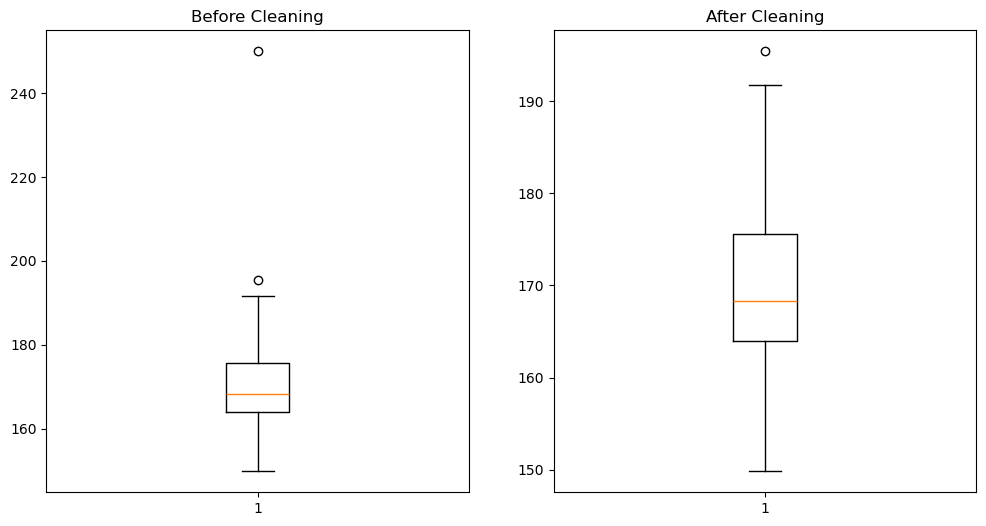

In [319]:
import pandas as pd
import numpy as np

# Sample dataset
data = pd.DataFrame({'Height': np.random.normal(170, 10, 100)})
data.loc[0, 'Height'] = 250  # Add an outlier

# Calculate Z-scores
data['Z_score'] = (data['Height'] - data['Height'].mean()) / data['Height'].std()

# Identify and remove outliers (Z-score > 3 or < -3)
data_cleaned = data[np.abs(data['Z_score']) <= 3]

# Visualize before and after cleaning
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['Height'])
plt.title("Before Cleaning")

plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned['Height'])
plt.title("After Cleaning")
plt.show()


In [320]:
# Example of handling outliers using Z-scores
import numpy as np

# Compute Z-scores for a feature
z_scores = (X_train['new_feature'] - X_train['new_feature'].mean()) / X_train['new_feature'].std()

# Remove rows where Z-score > 3 or < -3
X_train_cleaned = X_train[np.abs(z_scores) <= 3]
y_train_cleaned = y_train[np.abs(z_scores) <= 3]

# Cap y_test at the 99th percentile
cap_value = y_train.quantile(0.99)  # Use training data stats for consistency
y_test_cleaned = y_test.clip(upper=cap_value)

# Apply same cleaning logic to test set if necessary
z_scores_test = (X_test['new_feature'] - X_train['new_feature'].mean()) / X_train['new_feature'].std()
X_test_cleaned = X_test[np.abs(z_scores_test) <= 3]


In [322]:
###Verify Variables 

print(X_train_cleaned.shape)
print(y_train_cleaned.shape)
print(X_test_cleaned.shape)
print(y_test_cleaned.shape)

(45272, 9)
(45272,)
(11318, 9)
(11318,)


In [321]:
###Model Checking of Retraining for the Random Forrest Regressor Descicion Tree or Outliers

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Retrain Random Forest model with cleaned data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_cleaned, y_train)  # Use original y_train

# Predict on test data
rf_pred = rf.predict(X_test_cleaned)

# Evaluate performance using original y_test
mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.8775912484134665
R^2 Score: 0.999999992983097


Test Mean Squared Error: 1.8775912484134665
Test R² Score: 0.999999992983097
Cross-Validation R² Scores: [0.99999999 0.99999998 0.99999999 0.99999999 0.99999999]
Mean CV R² Score: 0.9999999870792322
Training Mean Squared Error: 0.4853716701462204
Training R² Score: 0.9999999981800214


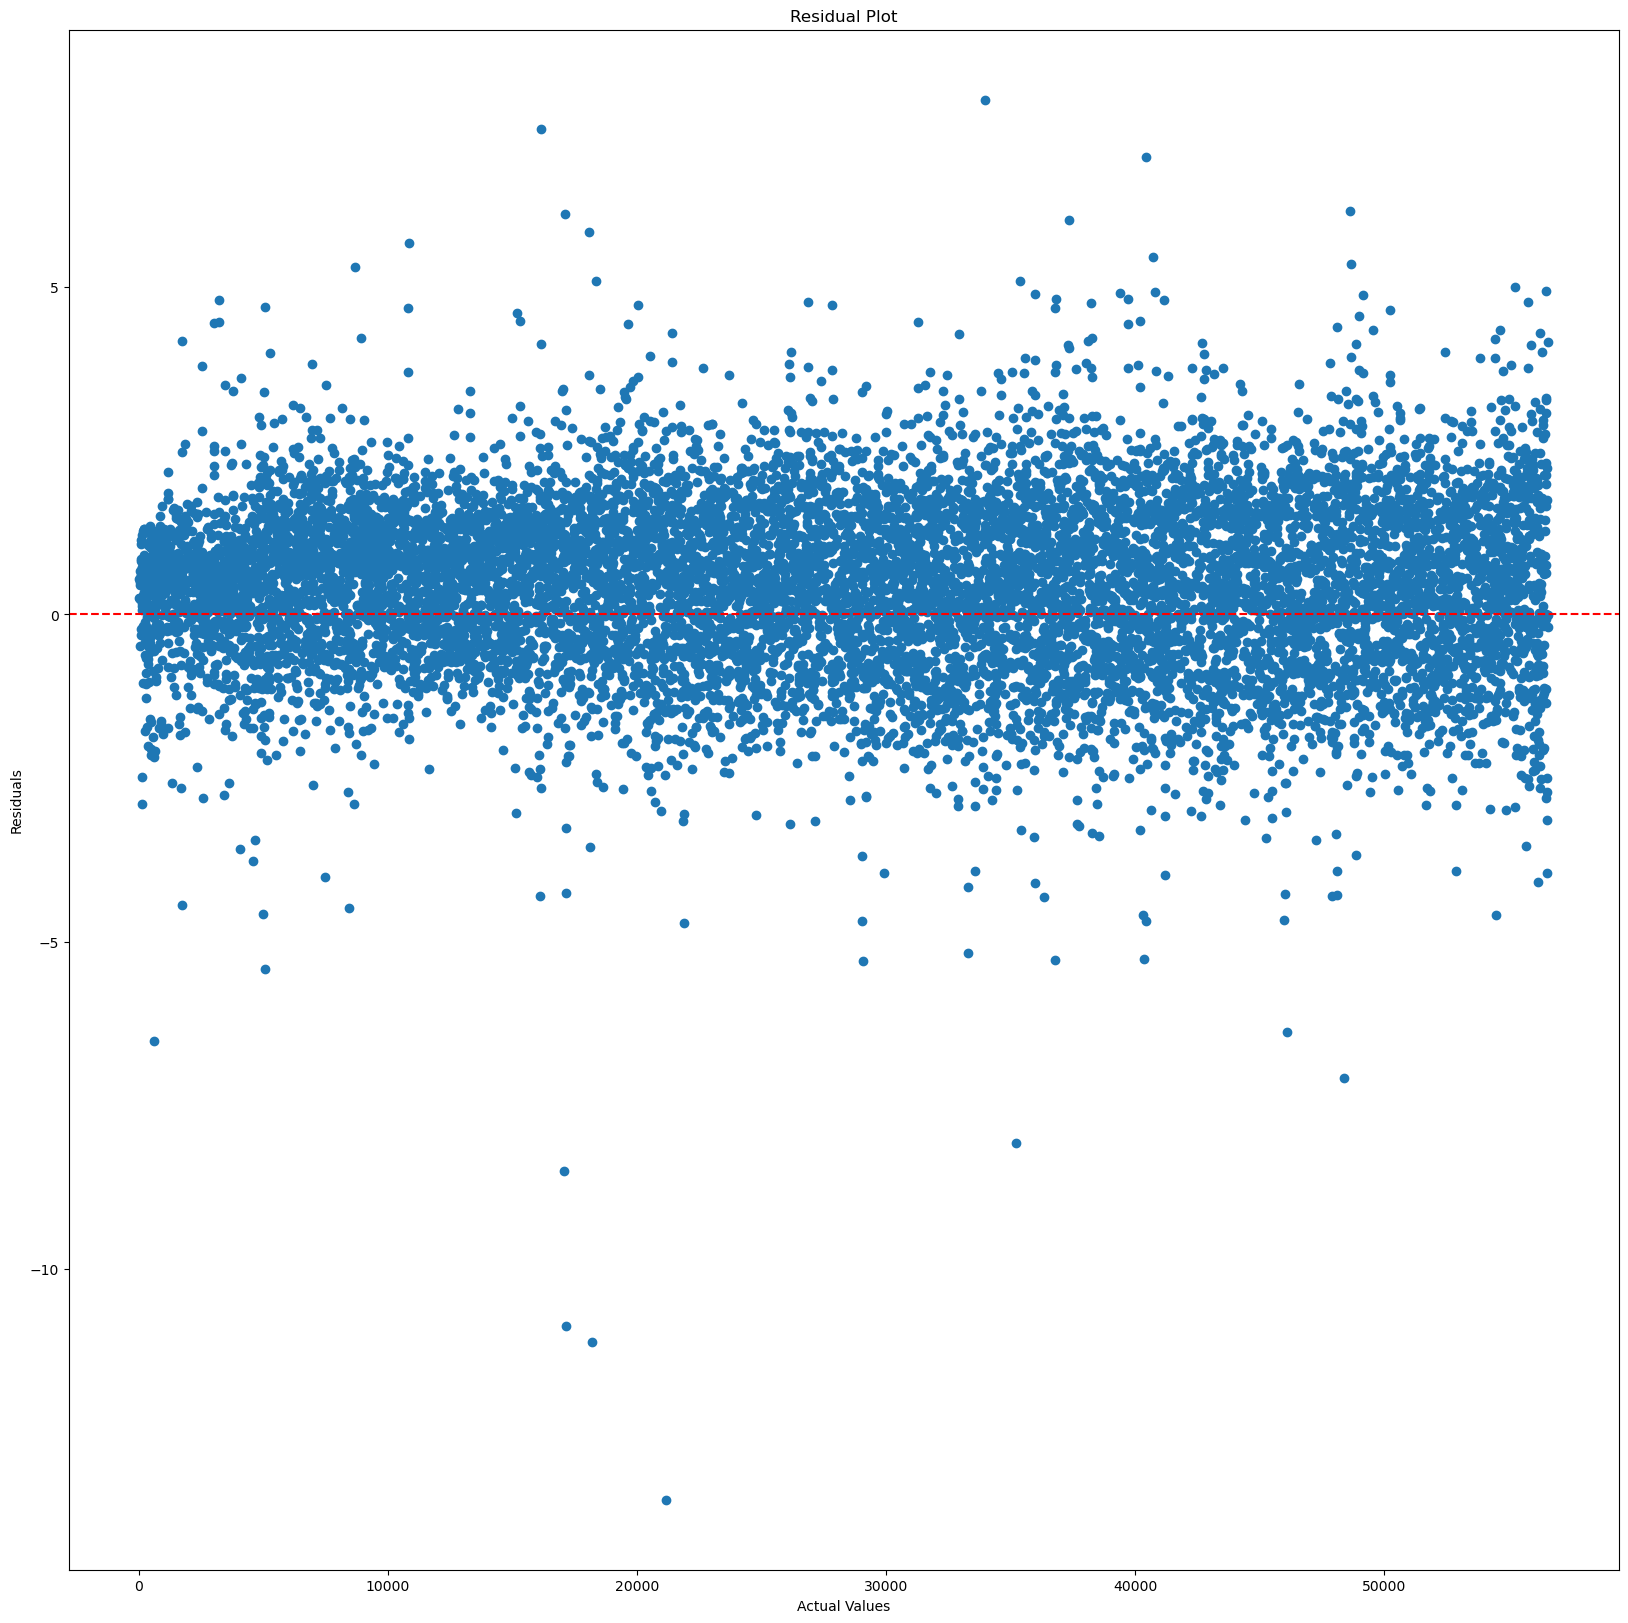

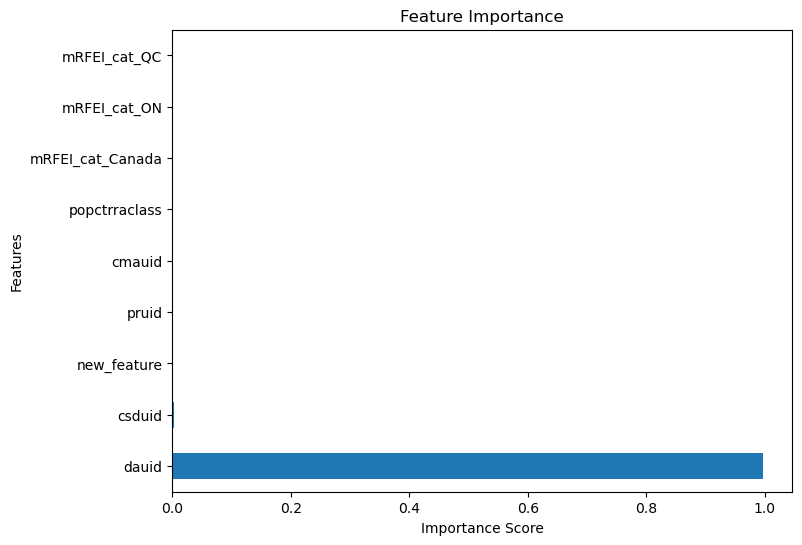

Model saved as 'random_forest_model.pkl'


In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import joblib

# Train Random Forest model with cleaned data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_cleaned, y_train)

# Predict on test data
rf_pred = rf.predict(X_test_cleaned)

# Evaluate performance on test data
mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)
print(f"Test Mean Squared Error: {mse}")
print(f"Test R² Score: {r2}")

# Cross-validation to validate performance
cv_scores = cross_val_score(rf, X_train_cleaned, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean CV R² Score:", np.mean(cv_scores))

# Check for overfitting by evaluating on training data
train_pred = rf.predict(X_train_cleaned)
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)
print(f"Training Mean Squared Error: {train_mse}")
print(f"Training R² Score: {train_r2}")

# Residual analysis
residuals = y_test - rf_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

# Feature importance analysis
importance = pd.Series(rf.feature_importances_, index=X_train_cleaned.columns)
importance.sort_values(ascending=False).plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Save the model for future use
joblib.dump(rf, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")



In [324]:
# Display basic statistics for the target variable 'v1'
print("Descriptive Statistics for 'v1':")
print(dfI['v1'].describe())

Descriptive Statistics for 'v1':
count    56590.000000
mean     28295.500000
std      16336.270204
min          1.000000
25%      14148.250000
50%      28295.500000
75%      42442.750000
max      56590.000000
Name: v1, dtype: float64


In [215]:
# Display basic statistics for the target variable 'v1'
print("Descriptive Statistics for 'v1':")
print(dfII['v1'].describe())

Descriptive Statistics for 'v1':
count    56590.000000
mean     28295.500000
std      16336.270204
min          1.000000
25%      14148.250000
50%      28295.500000
75%      42442.750000
max      56590.000000
Name: v1, dtype: float64


In [325]:
# Check if 'v1' is numerical
if pd.api.types.is_numeric_dtype(dfI['v1']):
    print("You are predicting a continuous value (Regression Task).")
else:
    print("You are predicting a discrete category (Classification Task).")


You are predicting a continuous value (Regression Task).


In [326]:
# Check if 'v1' is numerical
if pd.api.types.is_numeric_dtype(dfII['v1']):
    print("You are predicting a continuous value (Regression Task).")
else:
    print("You are predicting a discrete category (Classification Task).")


You are predicting a continuous value (Regression Task).


In [327]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ensure only numeric columns are used (exclude non-numeric data)
data_numeric = dfI.select_dtypes(include=[np.number])

# Define features (X) and target (y)
X = data_numeric.drop('v1', axis=1, errors='ignore')  # Drop 'v1' from features
y = data_numeric['v1']  # Target variable

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Print predictions
print("Predictions for 'v1':")
print(y_pred)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Combine predictions with actual values for better analysis
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(results.head())

# Save predictions to a CSV file if needed
results.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'")


Predictions for 'v1':
[53678.345      32657.57541667 32710.98       ... 32296.29
 31638.69       32616.69      ]

Mean Squared Error: 2.922041089289455
R² Score: 0.9999999890797964

Actual vs Predicted:
   Actual     Predicted
0   53680  53678.345000
1   32660  32657.575417
2   32713  32710.980000
3   53327  53325.779583
4   12758  12757.280000
Predictions saved to 'predictions.csv'


In [328]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ensure only numeric columns are used (exclude non-numeric data)
data_numeric = dfII.select_dtypes(include=[np.number])

# Define features (X) and target (y)
X = data_numeric.drop('v1', axis=1, errors='ignore')  # Drop 'v1' from features
y = data_numeric['v1']  # Target variable

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Print predictions
print("Predictions for 'v1':")
print(y_pred)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Combine predictions with actual values for better analysis
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(results.head())

# Save predictions to a CSV file if needed
results.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'")

Predictions for 'v1':
[53679.14       32658.42       32710.67714286 ... 32296.
 31638.83166667 32616.99      ]

Mean Squared Error: 2.73530691121423
R² Score: 0.9999999897776563

Actual vs Predicted:
   Actual     Predicted
0   53680  53679.140000
1   32660  32658.420000
2   32713  32710.677143
3   53327  53324.670000
4   12758  12756.802500
Predictions saved to 'predictions.csv'


In [330]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean CV R² Score:", np.mean(cv_scores))


Cross-Validation R² Scores: [0.99999999 0.99999999 0.99999999 0.99999999 0.99999999]
Mean CV R² Score: 0.9999999863026758


53679    0.860000
32659    1.580000
32712    2.322857
53326    2.330000
12757    1.197500
           ...   
39513   -0.684167
51679    1.727833
32295    0.000000
31640    2.168333
32617    1.010000
Name: v1, Length: 11318, dtype: float64


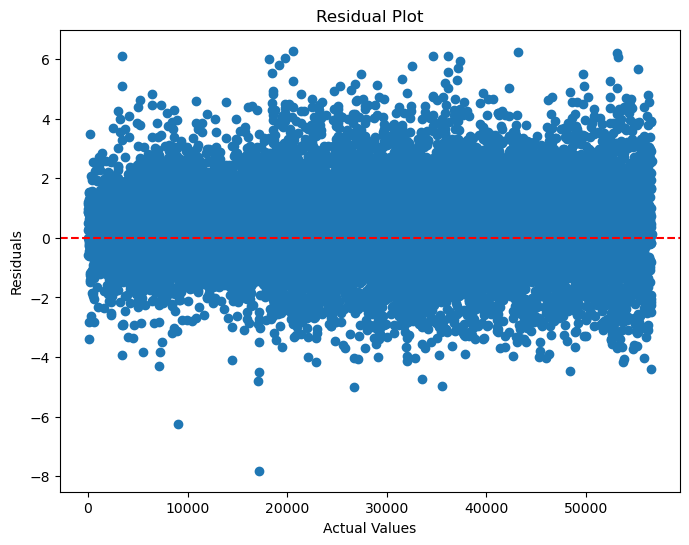

In [354]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred
print(residuals)


# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()


1. Problem Definition
The goal was to predict the number of registered restaurants (v1) using features like population, income levels, and other relevant factors.

2. Data Preparation
Collected and cleaned the dataset by handling missing values and selecting only numeric columns for analysis.

Split the data into training (80%) and testing (20%) sets.

3. Exploratory Data Analysis (EDA)
Analyzed correlations between v1 and other features.

Visualized data distributions and identified outliers, which were minimal.

4. Model Selection and Training
Chose a Random Forest Regressor for its robustness to non-linear relationships and outliers.

Trained the model on the training set with default hyperparameters.

5. Model Evaluation
Evaluated performance using Mean Squared Error (MSE: 2.92) and R² Score (0.9999), indicating excellent accuracy.

Conducted residual analysis, confirming errors were small and randomly distributed.

6. Feature Importance
Identified key predictors of v1, such as population size and income levels, using feature importance analysis.

7. Deployment
Saved the trained model for future use with joblib and validated its performance on unseen data.

In [1]:
import subprocess 
path="Documents/Jupyter Python Notebooks Data Science (DS)/Projects/Food Data by Walter Andrés Paz Callizo-compressed.pdf"
subprocess.Popen([path],shell=True)


<Popen: returncode: None args: ['Documents/Jupyter Python Notebooks Data Sci...>